# Zhang et al. (2024) Comparisons
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  12/09/2024          |
| Updated |  12/16/2024          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Atomic mass constant $m_\mathrm{u}$
  - Gas velocity (isothermal sound speed) $v_0 = c_\mathrm{s,iso} = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{u})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{u}) = \rho_0 R_\mathrm{ideal} T_0$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} = \mathcal{C} \equiv c/v_0 = c/c_\mathrm{s,iso}$
  - $\mathbb{P} = \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$

In [1]:
# BEGIN /athinput.[pgen]
# <radiation>
T_unit           = 6.14e3              # T_0 [K]
density_unit     = 4.28e-14            # \rho_0 [g/cm^3]
molecular_weight = 0.6                 # \mu
# END /athinput.[pgen]

# BEGIN athena/src/nr_radiation/radiation.cpp
# NRRadiation::NRRadiation(...) {
#   // universal constants we need
#   // https://physics.info/constants/
#   // arad = 4 * sigma/c
arad = 7.565733250033928e-15
c_speed = 2.99792458e10 # // speed of light

tunit = T_unit                # pin->GetOrAddReal("radiation","T_unit",1.e7);
rhounit = density_unit        # pin->GetOrAddReal("radiation","density_unit",1.0);
mol_weight = molecular_weight # pin->GetOrAddReal("radiation","molecular_weight",0.6);

# ...
#   }  else if (user_unit_ == 1) {
#      // calculate prat and crat based on user provided unit
r_ideal = 8.314462618e7/mol_weight
prat = arad * tunit * tunit * tunit/(rhounit * r_ideal)
cs_iso = (r_ideal * tunit)**(1/2)
crat = c_speed/cs_iso
# END athena/src/nr_radiation/radiation.cpp

# Extra conversions
m_u              = 1.66e-24            # atomic mass constant [g]
k_B              = 1.38e-16            # Boltzmann constant [erg/K]
P_0 = density_unit*r_ideal*T_unit
P_0alt = k_B*density_unit*T_unit/molecular_weight/m_u
prat_check = arad*T_unit**4/P_0

print(f'prat = {prat:.2e}')
print(f'crat = {crat:.2e}')
print(rf' P_0 = \rho_0*R_ideal*T_0       = {P_0:.2e} g/cm/s^2')
print(rf' P_0 = k_B*\rho_0*T_0/(\mu*m_u) = {P_0alt:.2e} g/cm/s^2')
print(f'(prat_check = a_r*T_0^4/P_0 = {prat_check:.2e})')


prat = 2.95e+02
crat = 3.25e+04
 P_0 = \rho_0*R_ideal*T_0       = 3.64e-02 g/cm/s^2
 P_0 = k_B*\rho_0*T_0/(\mu*m_u) = 3.64e-02 g/cm/s^2
(prat_check = a_r*T_0^4/P_0 = 2.95e+02)


From Jiang ([2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), under eq. 10),
$$
  T = \frac{P}{R_\mathrm{ideal}\rho},
$$
where $R_\mathrm{ideal} = R/\mu$.
$R$ is the gas constant, and the [mean molecular weight](http://astronomy.nmsu.edu/jasonj/565/docs/09_03.pdf) $\mu = \overline{m}/m_\mathrm{u}$, where $\overline{m}$ is the mean mass per particle and the [atomic mass constant](https://en.wikipedia.org/wiki/Dalton_(unit)) $m_\mathrm{u} \approx m_\mathrm{p}$, the proton mass.

## Stellar Properties

The luminosity $L = FA$, where $F$ is the flux and $A$ is the emission surface area.
For an emitting sphere with radius $R$, and $F = ca_\mathrm{r}T^4/4$ (Rybicki & Lightman 1979, eq. 1.43), where $ca_\mathrm{r}/4 = \sigma$ the Stefan–Boltzmann constant $\left[\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{cm}^{-2}\,\mathrm{K}^{-4}\right]$

\begin{align}
  L &= \frac{ca_\mathrm{r}}{4} T^4(4\pi R^2) \\
    &= \pi ca_\mathrm{r} T^4R^2
\end{align}

In [2]:
#===============================================================================
import numpy as np

# BEGIN athinput.[pgen]
# <radiation>
length_unit      = 5.98e14             # L_0 [cm]

# <problem>
R                = 1.16e-4             # solar radius [L_0]
T                = 9.42e-1             # solar temperature [T_0]
# END athinput.[pgen]

# Solar constants, astrophysical units and conversions
Lsun             = 3.83e33             # solar luminosity [erg/s]
Rsun             = 6.95700e10          # solar radius [cm]
au               = 1.495978707e13      # astronomical unit [cm]
L_au             = length_unit/au      # [au]

# Compute stellar flux and luminosity
Flux = lambda r : np.power(T, 4)*np.power(R/r, 2)/4 # stellar flux at r [c*a_r*T_0^4]
A = 4*np.pi*(R*length_unit)**2                      # surface area [cm^2]
L = Flux(R)*c_speed*arad*T_unit**4*A                      # luminosity [erg/s]

print(f'       R = {R*length_unit/Rsun:.2f} Rsun')
print(f'       T = {T*T_unit:.0f} K')
print(f'       L = {L/Lsun:.2f} Lsun')
print(f'F( 1 au) = {Flux(1/L_au):.2e} ca_rT_0^4'\
      + f' = {Flux(1/L_au)*c_speed*arad*T_unit**4:.2e} erg/cm^2/s'\
      + f' = {Flux(1/L_au)*c_speed*arad*T_unit**4/1e3:.0f} W/m^2 (solar constant)')
print(f'F(10 au) = {Flux(10/L_au):.2e} ca_rT_0^4'\
      + f' = {Flux(10/L_au)*c_speed*arad*T_unit**4:.2e} erg/cm^2/s'\
      + f' = {Flux(10/L_au)*c_speed*arad*T_unit**4/1e3:.1f} W/m^2')
# Flux at Saturn (~10 au) https://astronomy.stackexchange.com/a/25242/33232

       R = 1.00 Rsun
       T = 5784 K
       L = 1.00 Lsun
F( 1 au) = 4.23e-06 ca_rT_0^4 = 1.36e+06 erg/cm^2/s = 1364 W/m^2 (solar constant)
F(10 au) = 4.23e-08 ca_rT_0^4 = 1.36e+04 erg/cm^2/s = 13.6 W/m^2


## Theoretical Model

See [Desmos](https://www.desmos.com/) for interactive plots of 
- [$T = P/\rho$](https://www.desmos.com/calculator/ptyevuziu7)
- [$\rho_\mathrm{mid}$](https://www.desmos.com/calculator/ubtsqj1ltb)
- [$\rho(\theta)$](https://www.desmos.com/calculator/marlugmhhr)

In code units,
\begin{align*}
  T(r, \theta) &= \frac{P(r, \theta)}{\rho} = \frac{P_0}{\rho_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2} \\
  \rho_\mathrm{mid}(r) &= \frac{\rho_0\left(\frac{r + r_0}{r_0}\right)^{-9/4}}{1 + \exp\left[-\mathrm{e}^\mathrm{e}\left(\frac{r - r_0}{r_0}\right)\right]} \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right] \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right] \\
\end{align*}

Let $u_\mathrm{init}$ be the initial specific internal energy of the gas.
From the [classical ideal gas law](https://en.wikipedia.org/wiki/Equation_of_state#Classical_ideal_gas_law), in code units,

\begin{align*}
  T_\mathrm{init} &=  (\gamma - 1)u_\mathrm{init} \\
  u_\mathrm{init} &= \frac{P}{\rho(\gamma - 1)}
\end{align*}

h/r (r = L_0) = 0.06 (cf. original h/r_0 = 0.07)

/athinput.[pgen]
<problem>
...
kappa_a = 3.00e+02 cm^2/g
kappa_a = 7678.32000000000  # absorption opacity [1/(\rho_0*L_0)]
r_0 = 17.00 au
rho_0 = 8.56e-15 g
P_0/rho_0 = 29.47 K
M_gas = 1.13e-02 M_sun
M_dust = 1.30e-04 M_sun


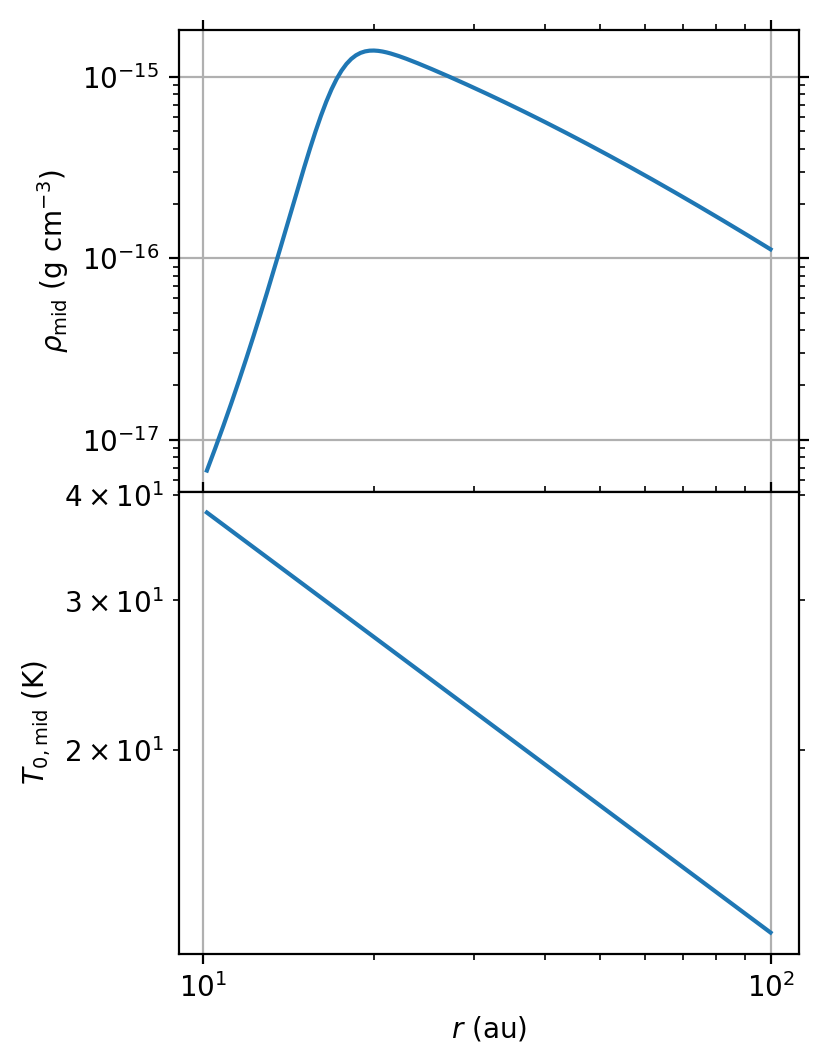

In [3]:
#===============================================================================
import numpy as np
import matplotlib.pyplot as plt

# BEGIN [pgen].cpp
# void Mesh::InitUserMeshData(ParameterInput *pin) {
# // Get parameters for gravitatonal potential of central point mass
gm0 = 1.0 # pin->GetOrAddReal("problem","GM",0.0);

# //---------------------------------------------------------------------------
# //! transform to cylindrical coordinate

def GetCylCoord(x1, x2, x3):
  rad = np.abs(x1*np.sin(x2))
  phi = x3
  z = x1*np.cos(x2)
  return rad, phi, z

# //---------------------------------------------------------------------------
# //! computes density in cylindrical coordinates

def DenProfileCyl(rad, phi, z):
  p_over_r = PoverR(rad, phi, z)
  denmid = rho0*np.power((rad + r0)/r0, dslope)\
           /(1 + np.exp(-np.exp(np.e)*(rad - r0)/r0))
  dentem = denmid*np.exp(gm0/p_over_r*(1./np.sqrt(rad**2 + z**2) - 1./rad))
  den = dentem
  return den

# //---------------------------------------------------------------------------
# //! computes density in cylindrical coordinates

def DenProfileCylOrig(rad, phi, z):
  p_over_r = PoverR(rad, phi, z)
  denmid = rho0*np.power(rad/r0, dslope)
  dentem = denmid*np.exp(gm0/p_over_r*(1./np.sqrt(rad**2 + z**2) - 1./rad))
  den = dentem
  return den

# //---------------------------------------------------------------------------
# //! computes pressure/density in cylindrical coordinates

def PoverR(rad, phi, z):
  poverr = p0_over_r0*np.power(rad/r0, pslope)
  return poverr
# END [pgen].cpp

# extra quantities
kappa_star_cgs    = 10                 # [cm^2/g]
dgratio           = 100                # dust-to-gas ratio
small_grain_ratio = 0.02184

# Solar constants, astrophysical units and conversions
Lsun             = 3.83e33             # solar luminosity [erg/s]
Rsun             = 6.95700e10          # solar radius [cm]
au               = 1.495978707e13      # astronomical unit [cm]
L_au             = length_unit/au      # [au]

# begin athinput.[pgen]
# <mesh>
nx1              = 256                 # Number of zones in X1-direction
x1min            = 0.250163663377926   # minimum value of X1
x1max            = 2.501636633779264   # maximum value of X1

nx2              = 1024                # Number of zones in X2-direction
x2min            = 0                   # minimum value of X2
x2max            = 3.141592653589793   # maximum value of X2

# <hydro>
dfloor           = 1e-12               # minimum density

# <radiation>
T_unit           = 6.14e3              # T_0 [K]
density_unit     = 4.28e-14            # \rho_0 [g/cm^3]
length_unit      = 5.98e14             # L_0 [cm]
molecular_weight = 0.6                 # \mu

# <problem>
r0               = 0.425278227742474   # disk radial normalization [L_0]
rho0             = 0.2                 # disk density normalization [\rho_0]
p0_over_r0       = 4.80e-03            # (H/r0)^2
pslope           = -0.5                # pressure power-law index
dslope           = -2.25               # density power-law index
kappa_a          = 300  # Planck mean absorption opacity [\rho_0*L_0]
# end athinput.[pgen]

# Conversions
def r2au(r):
  return r*L_au
def rho2cgs(rho):
  return rho*density_unit
def T2cgs(T):
  return T*T_unit
def mass2cgs(mass):
  return mass*density_unit*length_unit**3
def g2solar_mass(g):
  return g/1.988416e33
rad2deg          = 180/np.pi           # [deg]

# Compute dust opacity in code units
kappa_star = kappa_star_cgs*dgratio*small_grain_ratio*density_unit*length_unit
print(f'h/r (r = L_0) = {(PoverR(1, np.pi/2, 0))**0.5:.2f}'\
      + f' (cf. original h/r_0 = {p0_over_r0**0.5:.2f})\n')
print('/athinput.[pgen]\n<problem>\n...')
# print(rf'kappa_a = {kappa_a:.11f}  # absorption opacity [1/(\rho_0*L_0)]')
# print(rf'kappa_a = {kappa_a/density_unit/length_unit:.2e} cm^2/g')
print(rf'kappa_a = {kappa_a:.2e} cm^2/g')
print(rf'kappa_a = {kappa_a*density_unit*length_unit:.11f}  # absorption opacity [1/(\rho_0*L_0)]')

# Convert and print disk masses
print(f'r_0 = {r2au(r0):.2f} au')
print(f'rho_0 = {rho2cgs(rho0):.2e} g')
print(f'P_0/rho_0 = {T2cgs(p0_over_r0):.2f} K')
m_gas = g2solar_mass(mass2cgs(2.46155))
m_dust = g2solar_mass(mass2cgs(2.83015e-02))
print(f'M_gas = {m_gas:.2e} M_sun')
print(f'M_dust = {m_dust:.2e} M_sun')

# Generate fields
x1f, x2f = np.linspace(x1min, x1max, nx1+1), np.linspace(x2min, x2max, nx2+1)
x1v, x2v = (x1f[:-1] + x1f[1:])/2, (x2f[:-1] + x2f[1:])/2
x1mesh, x2mesh = np.meshgrid(x1v, x2v)
rads, phis, zs = GetCylCoord(x1mesh, x2mesh, 0)
rho_field_theo = DenProfileCyl(rads, phis, zs)
rho_field_theo[rho_field_theo < dfloor] = dfloor
rho_field_theo_orig = DenProfileCylOrig(rads, phis, zs)
rho_field_theo_orig[rho_field_theo_orig < dfloor] = dfloor
T_field_theo = PoverR(rads, phis, zs)
dtheta_theo = (x2max - x2min)/nx2
theta_mid_deg = 90
j_mid = int(theta_mid_deg/rad2deg/dtheta_theo)

# Plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4, 6), dpi=200)
# axs[0].plot(x1v*L_au, rho2cgs(rho_field_theo_orig[j_mid, :]), 'tab:green',
#             label=r'$\rho_\mathrm{gas}$')
axs[0].plot(x1v*L_au, rho2cgs(rho_field_theo[j_mid, :]), 'tab:blue',)
            # label=r'$\rho_\mathr$')
axs[1].plot(x1v*L_au, T_field_theo[j_mid, :]*T_unit, 'tab:blue')

# Format subplots
for ax in axs:
  ax.set(xscale='log', yscale='log')
  ax.grid()
  ax.minorticks_on()
  ax.tick_params(axis='both', which='both', top=True, right=True)

# axs[0].legend()
axs[0].set(ylabel=r'$\rho_\mathrm{mid}$ (g cm$^{-3}$)')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel=r'$r$ (au)',
           ylabel=r'$T_{0,\mathrm{mid}}$ (K)')
plt.subplots_adjust(hspace=0.0)
# plt.savefig('midplane.pdf', bbox_inches='tight', pad_inches=0.01)

## Constant Opacity

/home/stanley/github/PrincetonUniversity/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


sab/constopac


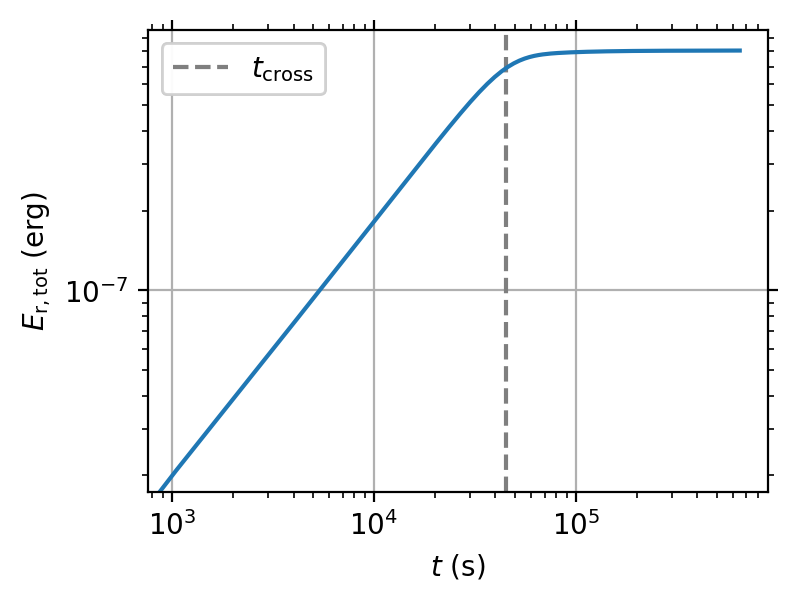

In [35]:
#===============================================================================
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
def t2s(t):
    return t*length_unit/cs_iso
def E2erg(E):
    return E*arad*T_unit**4
def T2cgs(T):
  return T*T_unit

fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
tab_colors = list(matplotlib.colors.TABLEAU_COLORS)
lss = ['dashdot', 'dashed', 'dotted', (0, (1, 5))]
c_solns, ref_soln = [], []
crat = None
theta = None

# Read and plot
problem_id = 'dsharp'
base = 'zhang24comp'
run = 'sab/constopac'
path = f'{base}/{run}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
reduced_factor = athinput['radiation']['reduced_factor']
length_unit = athinput['radiation']['length_unit']
molecular_weight = athinput['radiation']['molecular_weight']
arad = 7.565733250033928e-15
r_ideal = 8.314462618e7/molecular_weight
T_unit = athinput['radiation']['T_unit']
cs_iso = (r_ideal*T_unit)**0.5
Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
Vtot = (Vmax - Vmin)/2
gamma = athinput['hydro']['gamma'] # C_p/C_v = 1 + 2/DoF
hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
T_tot = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']
# Compute light crossing time for oblique beams
Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
    lines = Rad_angles.read().splitlines()
    crat = float(lines[2].split()[1])
    mu = '32   1.000000e+00   0.000000e+00   0.000000e+00    2.941176e-02'
    mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
    theta = np.arctan(mu_y/mu_x)
t_cross = Lx/np.cos(theta)/crat
ax.axvline(t2s(t_cross*reduced_factor), color='tab:gray', ls='dashed')
Er = hst['Er']
if 'n_frequency' in athinput['radiation']:
    nfreq = athinput['radiation']['n_frequency']
    Er = Er.reshape(-1, nfreq)
    Er = Er.sum(axis=1)
t_adj = hst['time']*reduced_factor
c_solns.append(ax.plot(t2s(t_adj), E2erg(Er), 'tab:blue',
               label=f'{run}')[0])

# Plot ghost point(s) for colorless linestyles
ref_soln.append(ax.plot([], [], 'tab:gray', ls='dashed',
                label=r'$t_\mathrm{cross}$')[0])
color_legend = plt.legend(title=r'$N_f$', handles=c_solns)
soln_legend = plt.legend(handles=ref_soln)
# ax.add_artist(color_legend)
ax.add_artist(soln_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True)
ax.set(xlabel=r'$t$ (s)', ylabel=r'$E_\mathrm{r,tot}$ (erg)', xscale='log',
       yscale='log')
# plt.savefig('evolution.pdf', bbox_inches='tight', pad_inches=0.01)
print(run)

zhang24comp/sab/constopac


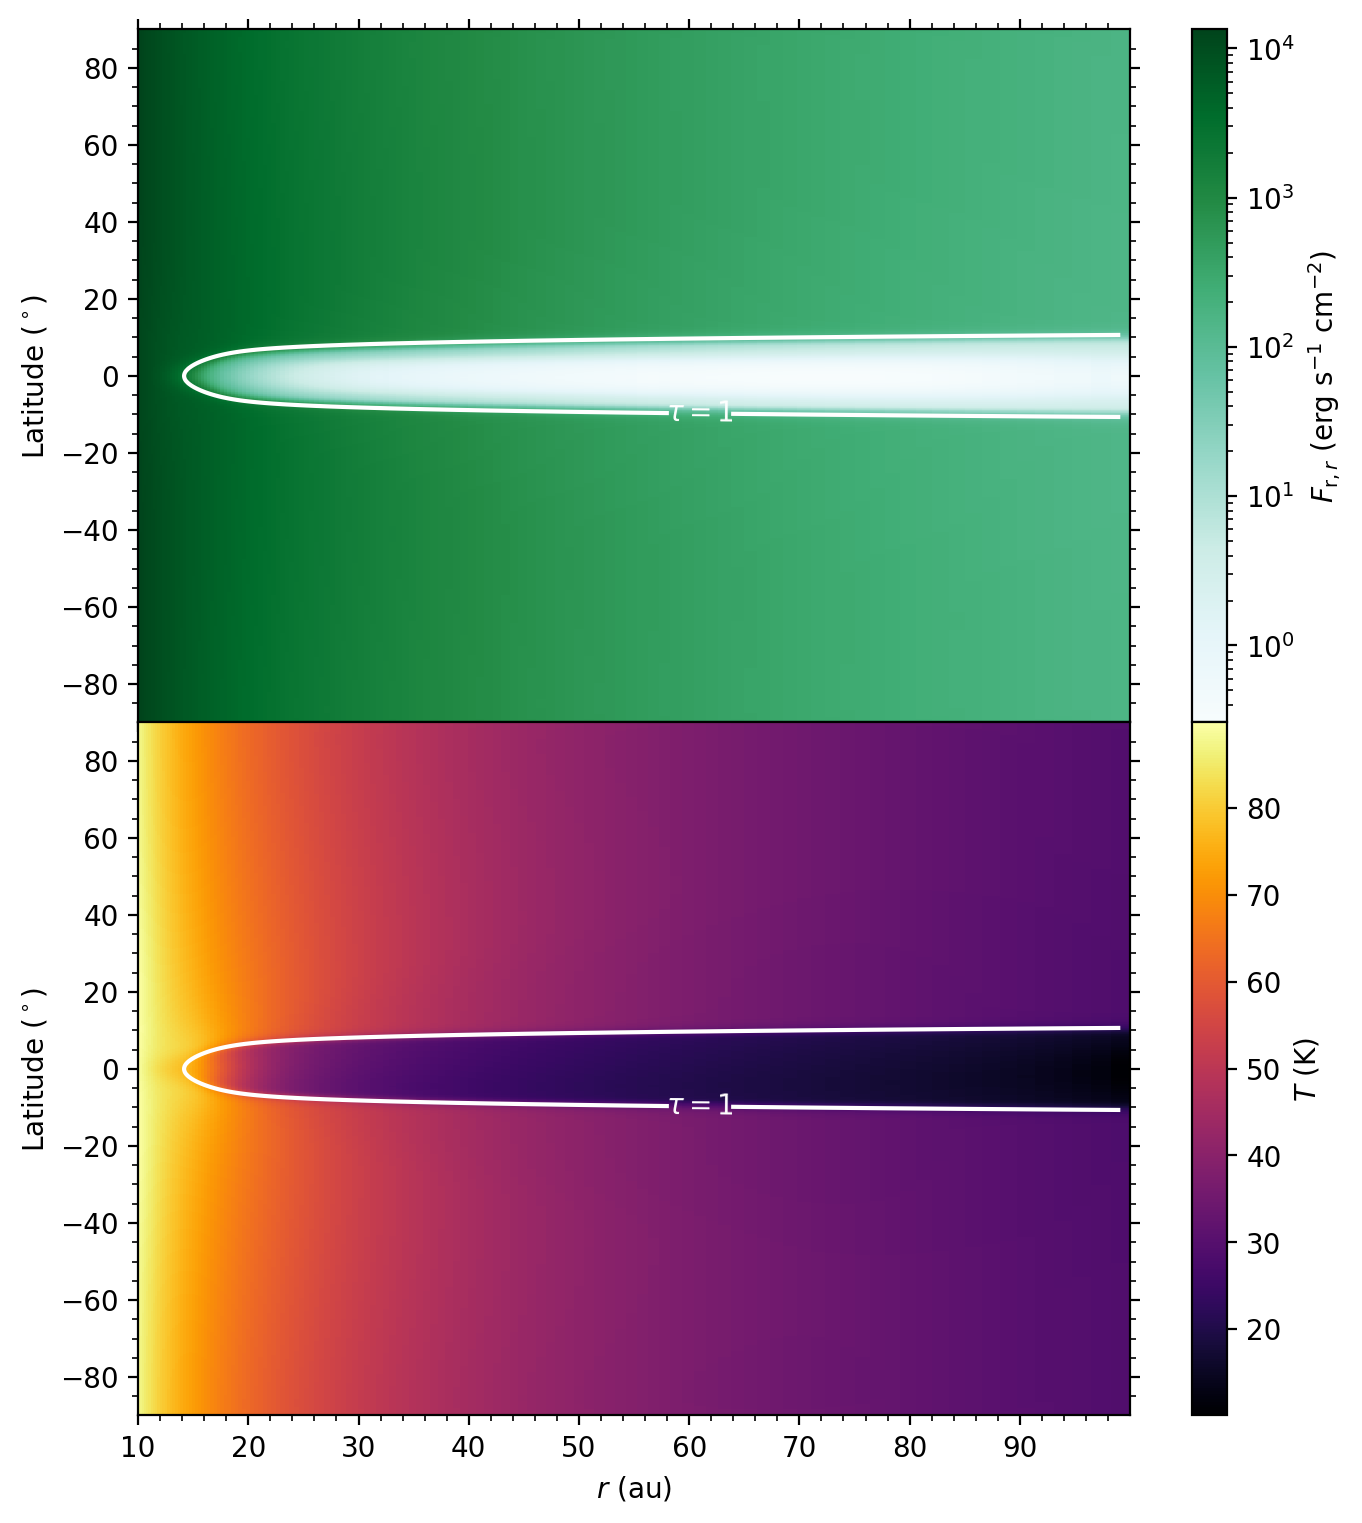

In [24]:
#===============================================================================
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Contour labels
def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg = 180/np.pi      # [deg]

# Constants
arad    = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
au      = 1.495978707e13 # astronomical unit [cm]
L_au    = length_unit/au # [au]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=200)
path = f'zhang24comp/sab/constopac'
problem_id = 'dsharp'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
L_au    = length_unit/au # [au]
T_unit = athinput['radiation']['T_unit']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im0 = axs[0].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        Fx_field*c_speed*arad*T_unit**4, cmap='BuGn',
                        norm=colors.LogNorm())
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im1 = axs[1].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        T_field*T_unit, cmap='inferno')#, norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

# Format plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, tau_field, [1, 1e5],
                  colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.minorticks_on()
  ax.set(ylabel=r'Latitude ($^\circ$)')
  ax.tick_params(axis='both', which='both', right=True)
plt.colorbar(im0, label=r'$F_{\mathrm{r},r}$ (erg s$^{-1}$ cm$^{-2}$)')
plt.colorbar(im1, label=r'$T$ (K)')
plt.subplots_adjust(hspace=0)
# axs[0].set(title=rf'Athena++ ($N_f={N_f}$)')
axs[0].tick_params(axis='both', which='both', top=True)
axs[1].set(xlabel=r'$r$ (au)')
# plt.savefig('thermal_equilibrium.png', dpi=600, bbox_inches='tight',
#             pad_inches=0.01)
print(f'{path}')

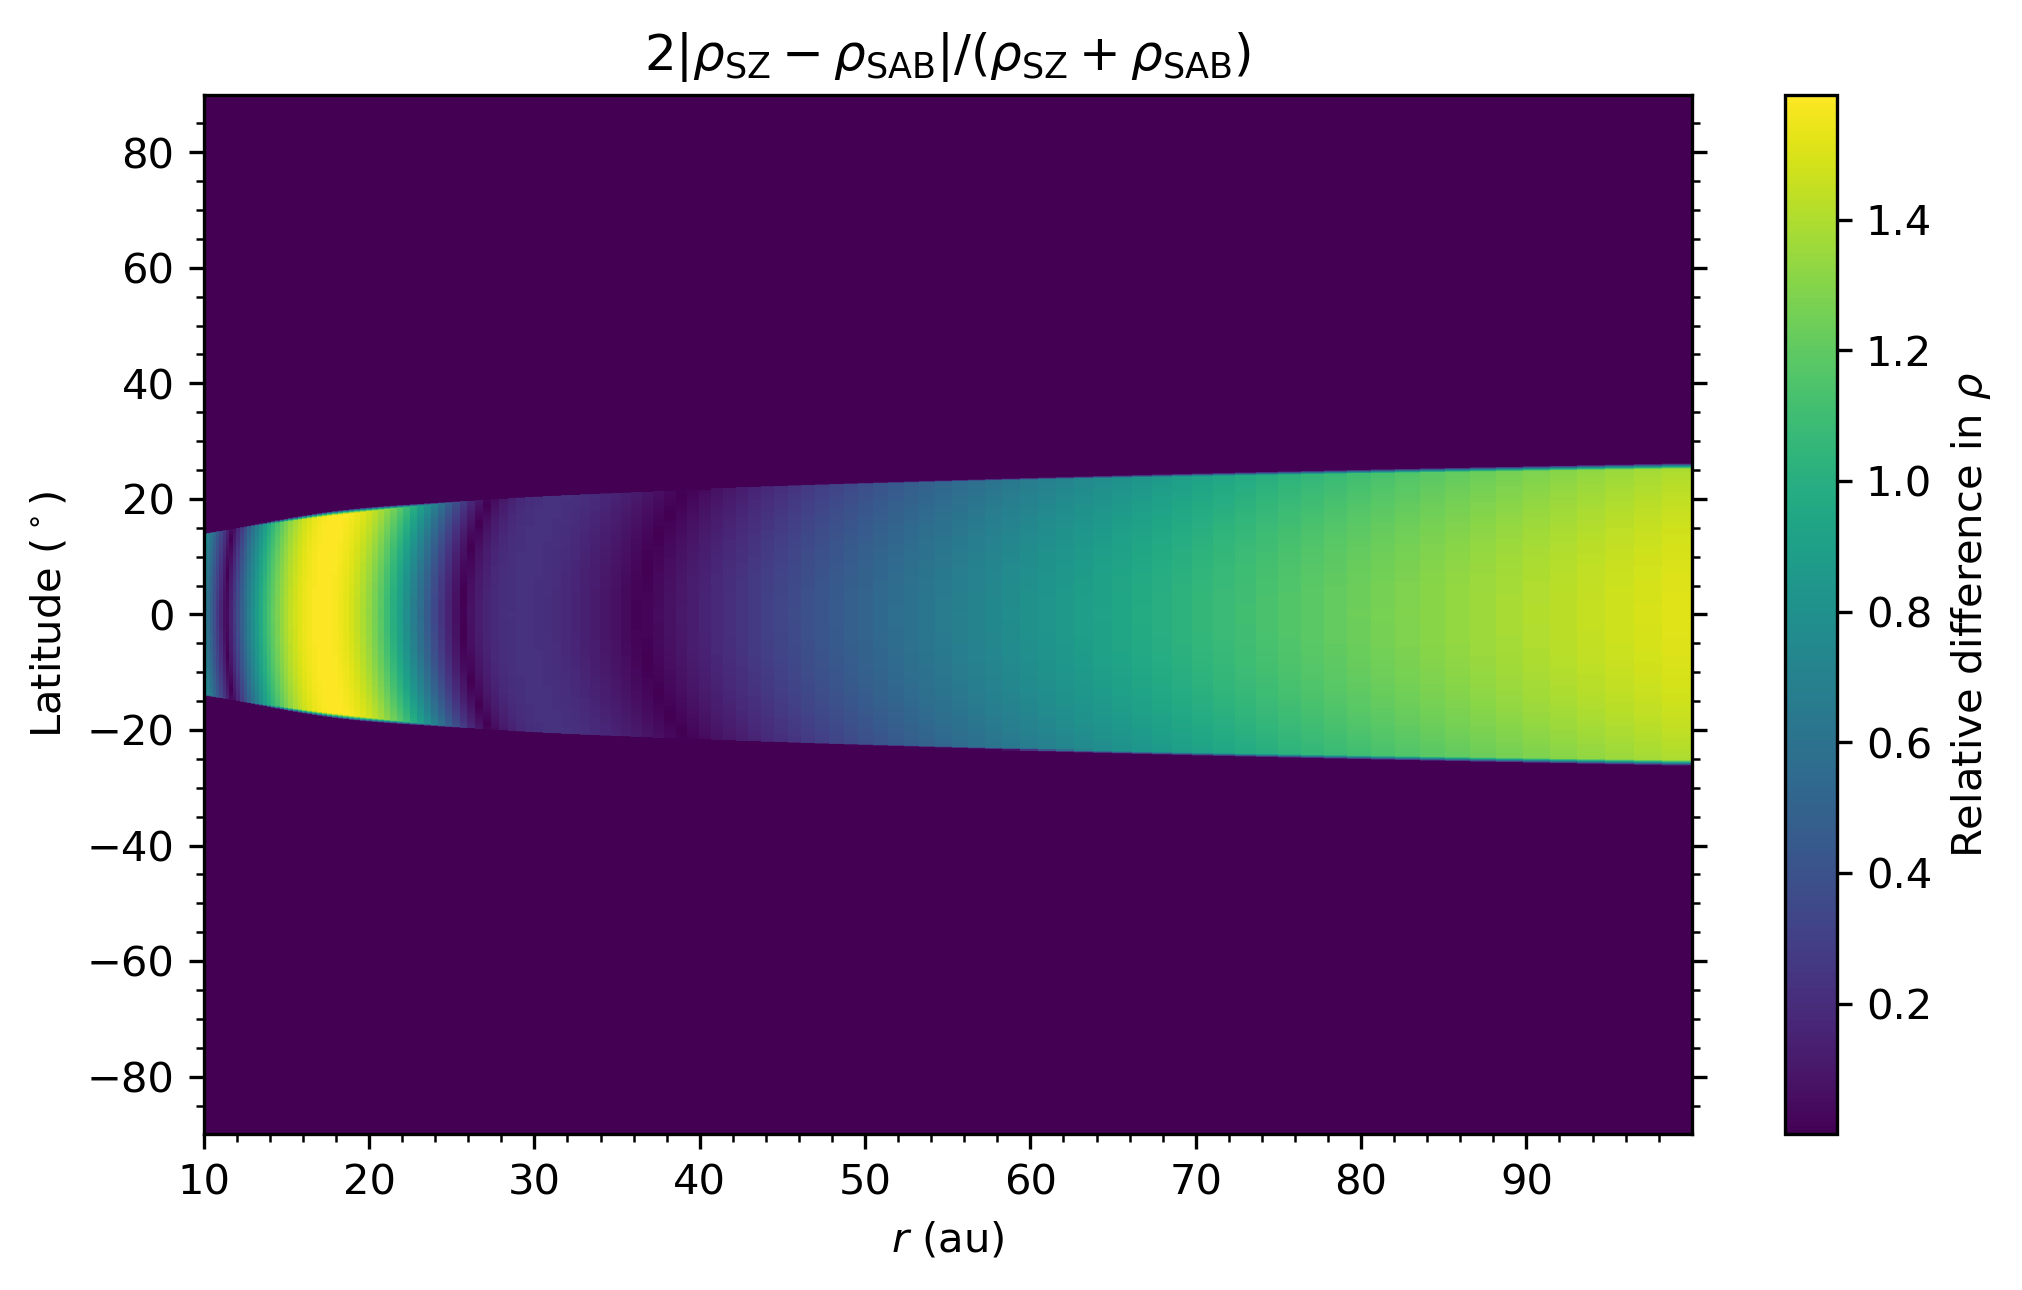

In [27]:
#===============================================================================
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Constants, units, conversions
rad2deg = 180/np.pi      # [deg]
au      = 1.495978707e13 # astronomical unit [cm]

# SAB
problem_id = 'dsharp'
path = f'zhang24comp/sab/constopac'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
L_au = length_unit/au
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
rho_sab = athdf['rho'][0]

# SZ
path = f'zhang24comp/sz/constopac'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00000.athdf')
rho_sz = athdf['rho'][0]

# Plot
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
rel_diff = 2*np.abs(rho_sz - rho_sab)/(rho_sz + rho_sab)
im = ax.pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, rel_diff)

# Format (sub)plots
plt.colorbar(im, label=r'Relative difference in $\rho$')
ax.minorticks_on()
ax.set(xlabel='$r$ (au)', ylabel=r'Latitude ($^\circ$)',
       title=r'$2|\rho_\mathrm{SZ} - \rho_\mathrm{SAB}|$'\
             +r'$/(\rho_\mathrm{SZ} + \rho_\mathrm{SAB})$')
ax.tick_params(axis='both', which='both', right=True)

zhang24comp/sz/constopac


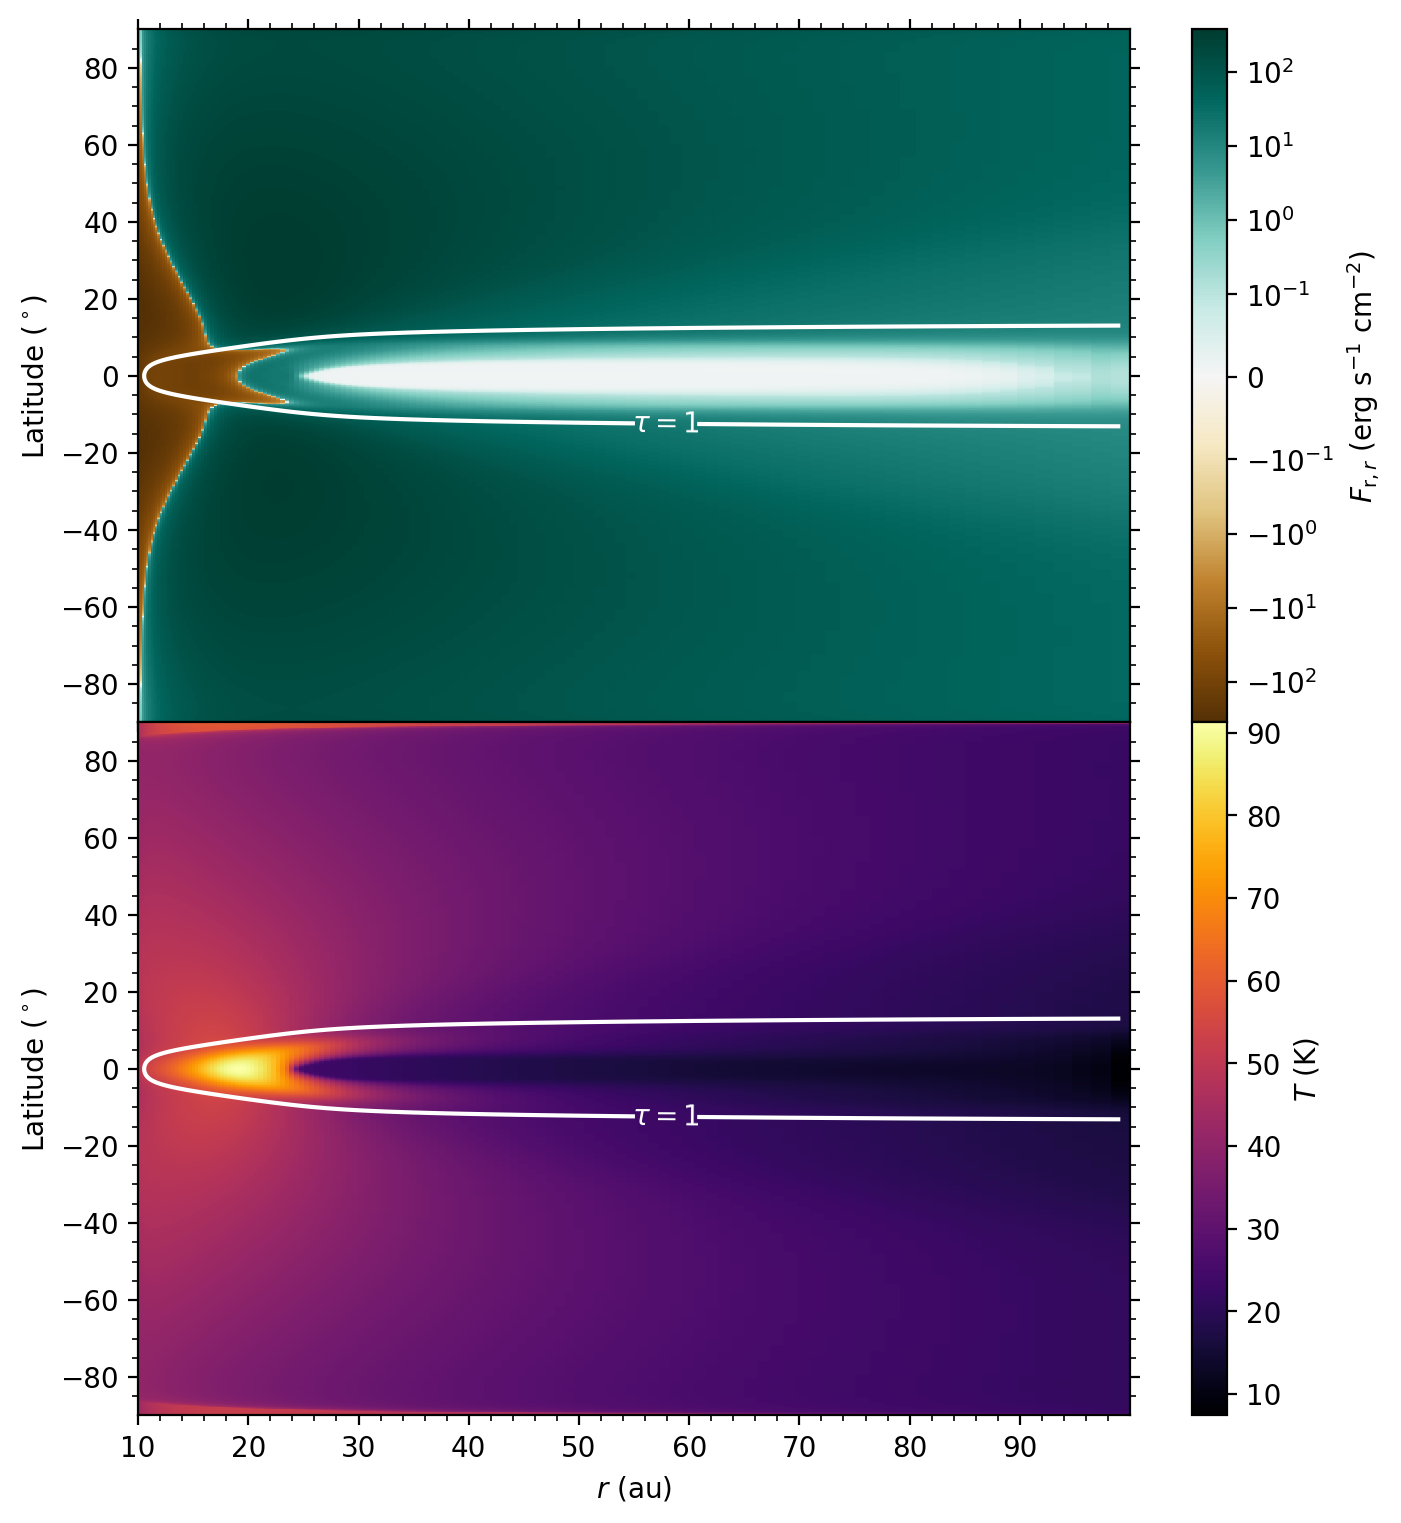

In [25]:
#===============================================================================
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Contour labels
def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg = 180/np.pi      # [deg]

# Constants
arad    = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
au      = 1.495978707e13 # astronomical unit [cm]
L_au    = length_unit/au # [au]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=200)
path = f'zhang24comp/sz/constopac'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
length_unit = athinput['radiation']['lunit']
L_au    = length_unit/au # [au]
T_unit = athinput['radiation']['Tunit']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00100.athdf')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im0 = axs[0].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        Fx_field*c_speed*arad*T_unit**4, cmap='BrBG',
                        norm=colors.SymLogNorm(linthresh=1e-1, linscale=1))
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im1 = axs[1].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        T_field*T_unit, cmap='inferno')#, norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

# Format plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, tau_field, [1, 1e5],
                  colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.minorticks_on()
  ax.set(ylabel=r'Latitude ($^\circ$)')
  ax.tick_params(axis='both', which='both', right=True)
plt.colorbar(im0, label=r'$F_{\mathrm{r},r}$ (erg s$^{-1}$ cm$^{-2}$)')
plt.colorbar(im1, label=r'$T$ (K)')
plt.subplots_adjust(hspace=0)
# axs[0].set(title=rf'Athena++ ($N_f={N_f}$)')
axs[0].tick_params(axis='both', which='both', top=True)
axs[1].set(xlabel=r'$r$ (au)')
# plt.savefig('thermal_equilibrium.png', dpi=600, bbox_inches='tight',
#             pad_inches=0.01)
print(f'{path}')

constopac


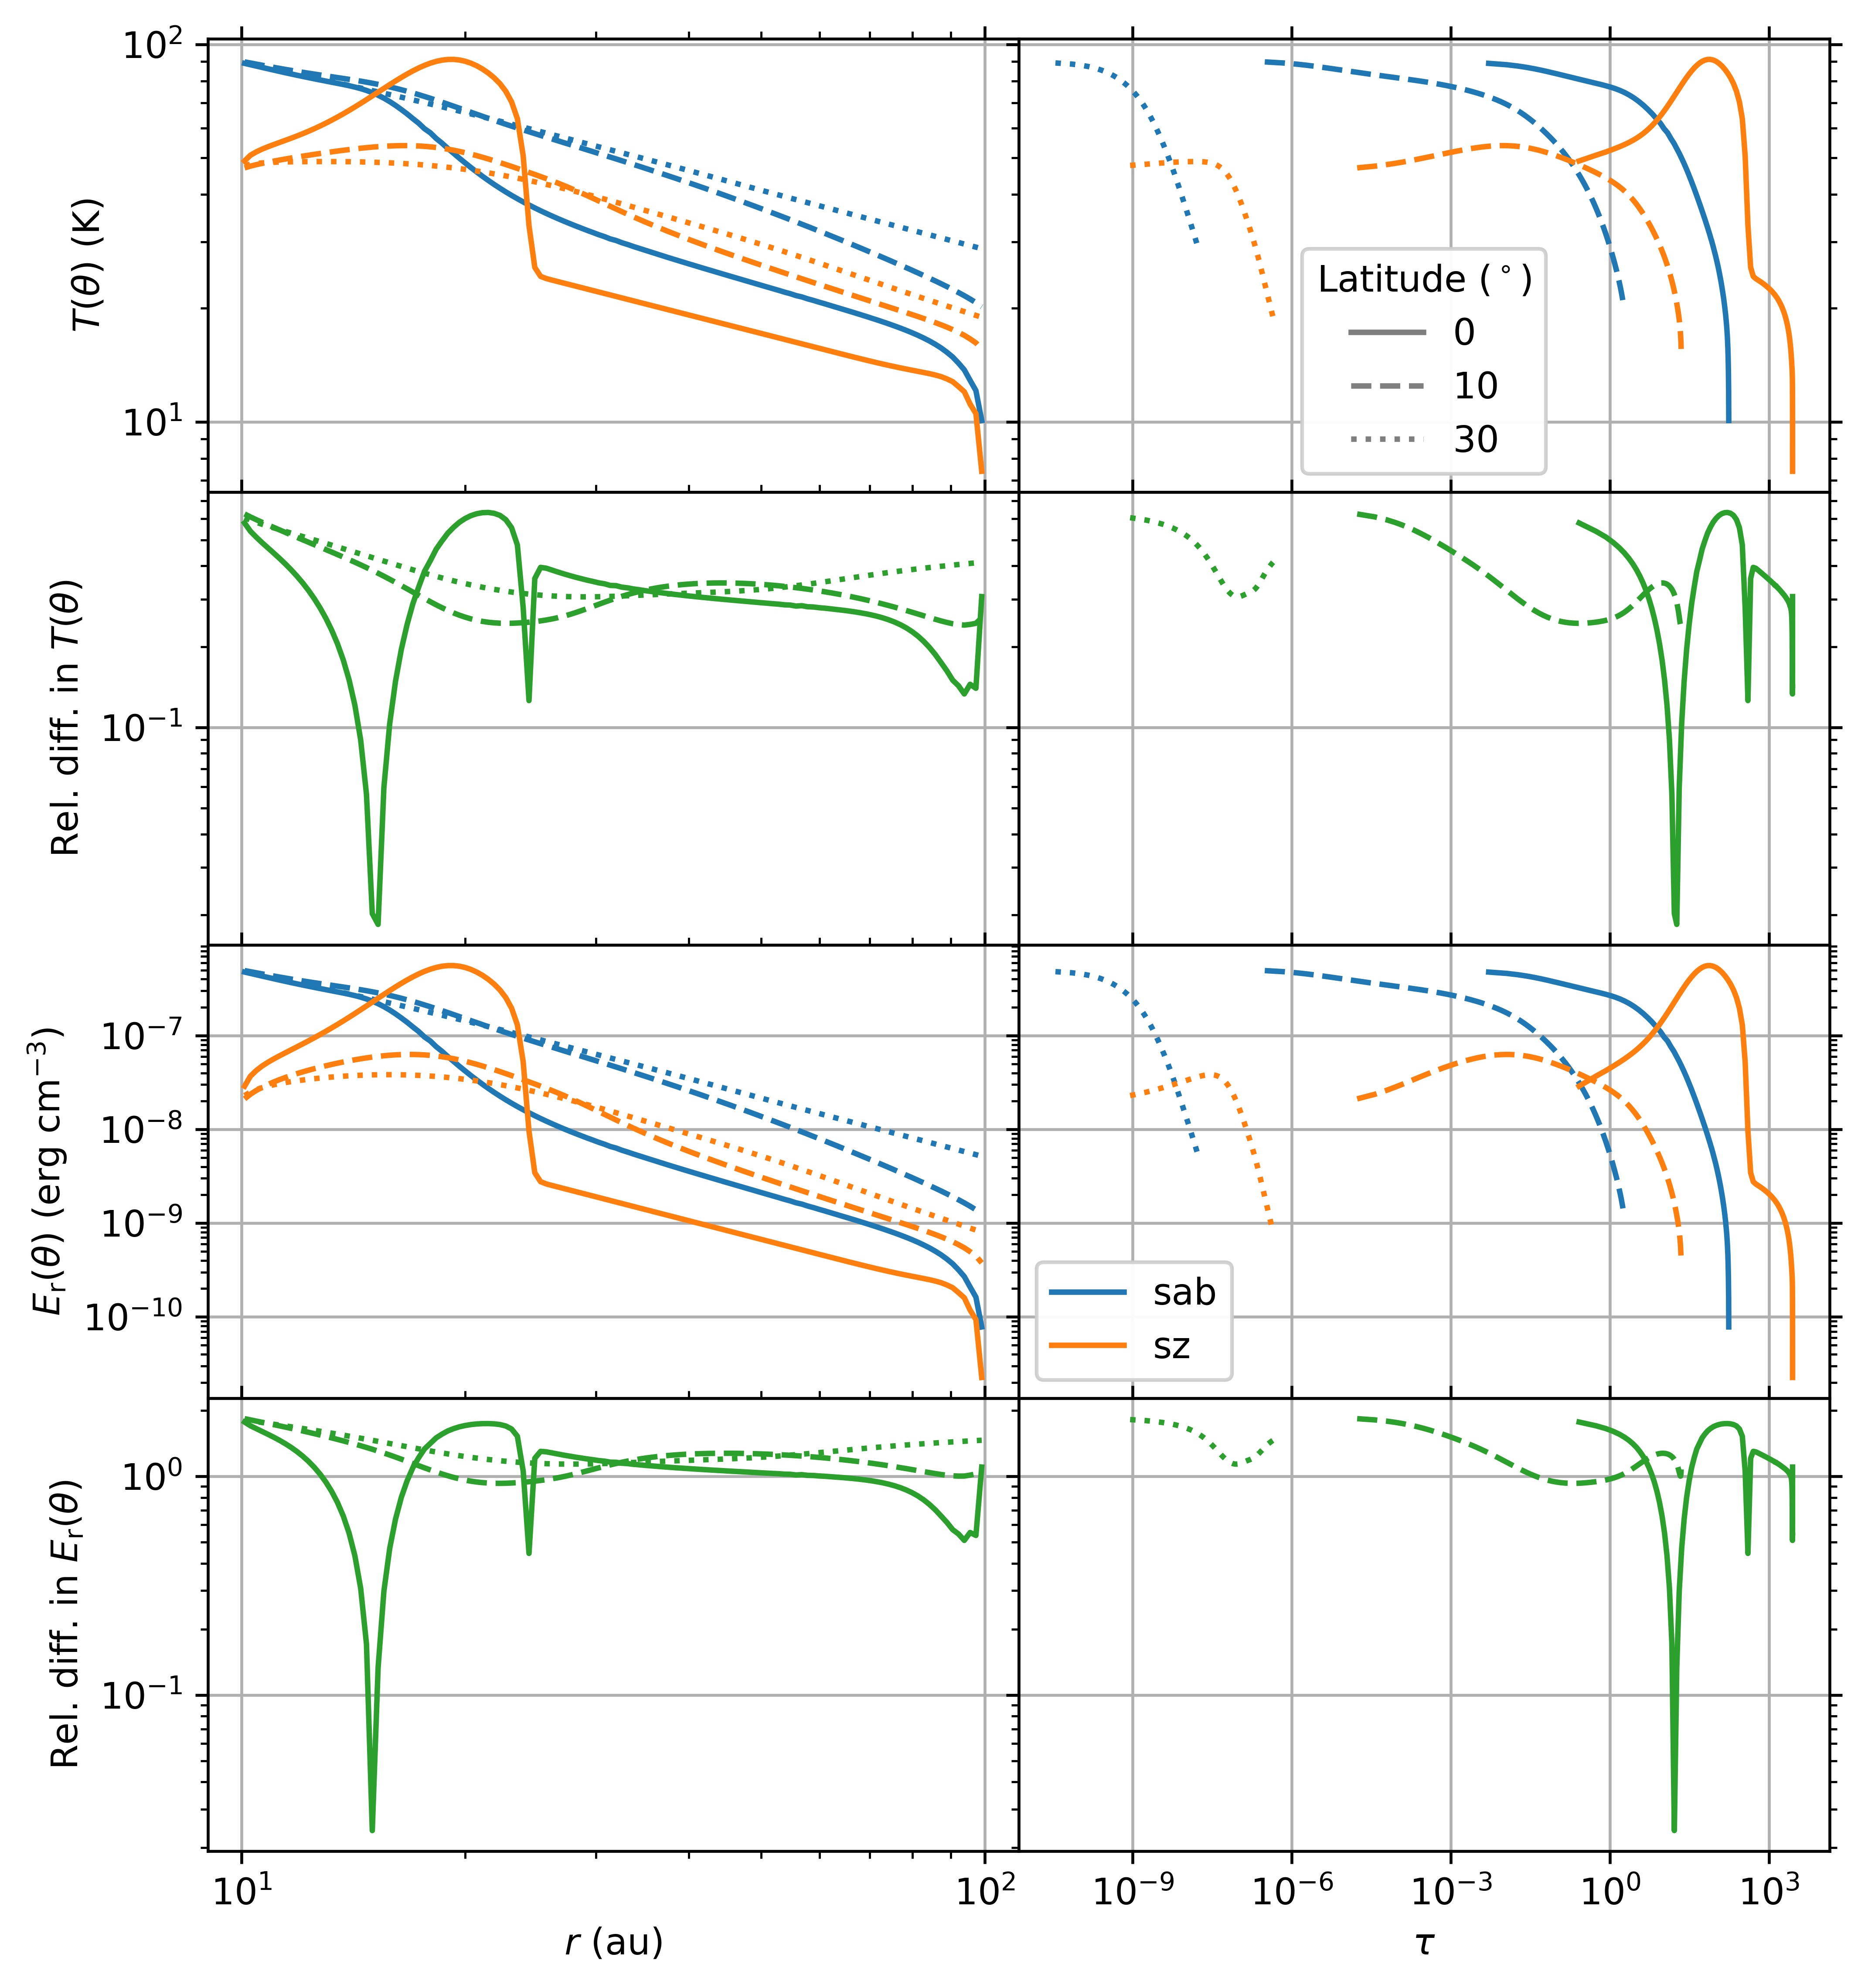

In [44]:
#===============================================================================
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Constants, units, conversions
arad    = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
rad2deg = 180/np.pi      # [deg]
au      = 1.495978707e13 # astronomical unit [cm]

# Prepare plots
fig, axs = plt.subplots(nrows=4, ncols=2, sharex='col', sharey='row',
                        figsize=(8, 9), dpi=600)
tab_colors = list(matplotlib.colors.TABLEAU_COLORS)
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 80, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# SAB
problem_id = 'dsharp'
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'\
       +f'{problem_id}_abs-sca/zhang24comp'
run = 'sab/constopac'
path = f'{base}/{run}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
T_unit = athinput['radiation']['T_unit']
L_au = length_unit/au
dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
          /athinput['mesh']['nx2']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
dusttemp = athdf['press'][0]/athdf['rho'][0]*T_unit
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau = np.cumsum(dtau, axis=1)
Er = athdf['Er'][0]*arad*T_unit**4
for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    axs[0][0].plot(athdf['x1v']*L_au, dusttemp[j,:], tab_colors[0], ls=lss[th])
    axs[2][0].plot(athdf['x1v']*L_au, Er[j,:], tab_colors[0], ls=lss[th])
    axs[0][1].plot(tau[j,:], dusttemp[j,:], tab_colors[0], ls=lss[th])
    axs[2][1].plot(tau[j,:], Er[j,:], tab_colors[0],ls=lss[th])
c_solns.append(axs[1][1].plot([], [], tab_colors[0], label=f'{run[:-10]}')[0])

# SZ
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'\
       +f'{problem_id}_abs-sca/zhang24comp'
run = 'sz/constopac'
path = f'{base}/{run}'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
length_unit = athinput['radiation']['lunit']
T_unit = athinput['radiation']['Tunit']
L_au = length_unit/au
dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
          /athinput['mesh']['nx2']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00100.athdf')
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau = np.cumsum(dtau, axis=1)
T_field = athdf['press'][0]/athdf['rho'][0]
Er_field = athdf['Er'][0]
for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    rel_diff_T = 2*np.abs(T_field[j, :]*T_unit - dusttemp[j,:])\
                 /(T_field[j, :]*T_unit + dusttemp[j,:])
    rel_diff_Er = 2*np.abs(Er_field[j, :]*arad*T_unit**4 - Er[j,:])\
                  /(Er_field[j, :]*arad*T_unit**4 + Er[j,:])
    axs[0][0].plot(athdf['x1v']*L_au, T_field[j, :]*T_unit, tab_colors[1],
                   ls=lss[th])
    axs[1][0].plot(athdf['x1v']*L_au, rel_diff_T, tab_colors[2], ls=lss[th])
    axs[2][0].plot(athdf['x1v']*L_au, Er_field[j, :]*arad*T_unit**4,
                   tab_colors[1], ls=lss[th])
    axs[3][0].plot(athdf['x1v']*L_au, rel_diff_Er, tab_colors[2], ls=lss[th])
    axs[0][1].plot(tau[j, :], T_field[j, :]*T_unit, tab_colors[1], ls=lss[th])
    axs[1][1].plot(tau[j, :], rel_diff_T, tab_colors[2], ls=lss[th])
    axs[2][1].plot(tau[j, :], Er_field[j, :]*arad*T_unit**4, tab_colors[1],
                   ls=lss[th])
    axs[3][1].plot(tau[j, :], rel_diff_Er, tab_colors[2], ls=lss[th])
    ls_thetas.append(axs[0][0].plot([], [], 'tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])
c_solns.append(axs[1][1].plot([], [], tab_colors[1], label=f'{run[:-10]}')[0])

# Plot ghost points for colorless line style and add legends
ls_legend = axs[0][1].legend(title=r'Latitude ($^\circ)$', handles=ls_thetas)
color_legend = axs[2][1].legend(handles=c_solns)
# soln_legend = axs[1].legend(handles=ref_soln)
axs[0][1].add_artist(ls_legend)
axs[2][1].add_artist(color_legend)
# axs[1].add_artist(soln_legend)

# Format (sub)plots
for ax in axs.flat:
  ax.grid()
  ax.minorticks_on()
  ax.set(xscale='log', yscale='log')
  ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][0].set(ylabel=r'$T(\theta)$ (K)')
axs[1][0].set(ylabel=r'Rel. diff. in $T(\theta)$')
axs[2][0].set(ylabel=r'$E_\mathrm{r}(\theta)$ (erg cm$^{-3}$)')
axs[3][0].set(ylabel=r'Rel. diff. in $E_\mathrm{r}(\theta)$',
              xlabel=r'$r$ (au)')
axs[3][1].set(xlabel=r'$\tau$')
# fig.suptitle(r'$\kappa_{f,\mathrm{D}\sharp}^\mathrm{abs+sca}$', y=0.92)
plt.subplots_adjust(hspace=0, wspace=0)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)
print(f'{run[-9:]}')

## Hybrid

dsharp_abs-nonRTE/nfreq/64


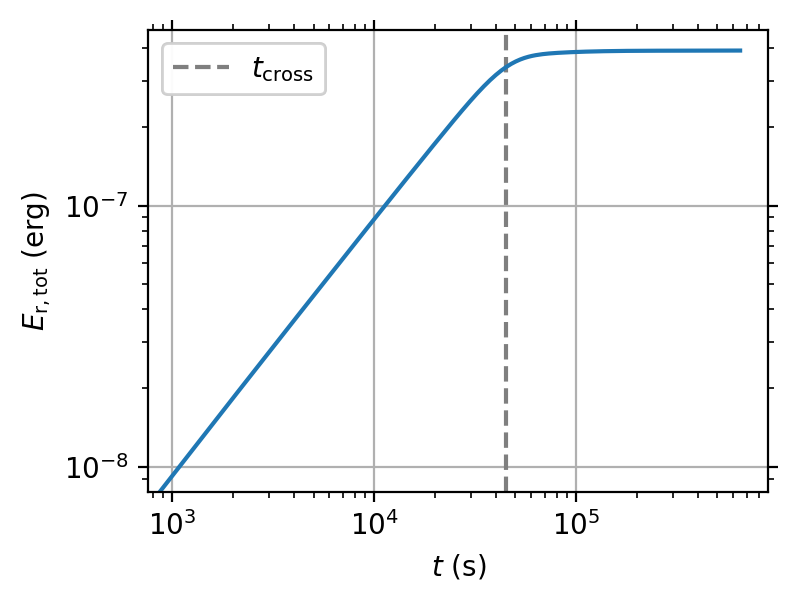

In [37]:
#===============================================================================
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
def t2s(t):
    return t*length_unit/cs_iso
def E2erg(E):
    return E*arad*T_unit**4
def T2cgs(T):
  return T*T_unit

fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
tab_colors = list(matplotlib.colors.TABLEAU_COLORS)
lss = ['dashdot', 'dashed', 'dotted', (0, (1, 5))]
c_solns, ref_soln = [], []
crat = None
theta = None

# Read and plot
problem_id = 'dsharp'
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'
run = f'{problem_id}_abs-nonRTE/nfreq/64'
path = f'{base}/{run}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
reduced_factor = athinput['radiation']['reduced_factor']
length_unit = athinput['radiation']['length_unit']
molecular_weight = athinput['radiation']['molecular_weight']
arad = 7.565733250033928e-15
r_ideal = 8.314462618e7/molecular_weight
T_unit = athinput['radiation']['T_unit']
cs_iso = (r_ideal*T_unit)**0.5
Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
Vtot = (Vmax - Vmin)/2
gamma = athinput['hydro']['gamma'] # C_p/C_v = 1 + 2/DoF
hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
T_tot = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']
# Compute light crossing time for oblique beams
Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
    lines = Rad_angles.read().splitlines()
    crat = float(lines[2].split()[1])
    mu = '32   1.000000e+00   0.000000e+00   0.000000e+00    2.941176e-02'
    mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
    theta = np.arctan(mu_y/mu_x)
t_cross = Lx/np.cos(theta)/crat
ax.axvline(t2s(t_cross*reduced_factor), color='tab:gray', ls='dashed')
Er = hst['Er']
if 'n_frequency' in athinput['radiation']:
    nfreq = athinput['radiation']['n_frequency']
    Er = Er.reshape(-1, nfreq)
    Er = Er.sum(axis=1)
t_adj = hst['time']*reduced_factor
c_solns.append(ax.plot(t2s(t_adj), E2erg(Er), 'tab:blue',
               label=f'{run}')[0])

# Plot ghost point(s) for colorless linestyles
ref_soln.append(ax.plot([], [], 'tab:gray', ls='dashed',
                label=r'$t_\mathrm{cross}$')[0])
color_legend = plt.legend(title=r'$N_f$', handles=c_solns)
soln_legend = plt.legend(handles=ref_soln)
# ax.add_artist(color_legend)
ax.add_artist(soln_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.tick_params(axis='both', which='both', top=True, right=True)
ax.set(xlabel=r'$t$ (s)', ylabel=r'$E_\mathrm{r,tot}$ (erg)', xscale='log',
       yscale='log')
# plt.savefig('evolution.pdf', bbox_inches='tight', pad_inches=0.01)
print(run)

dsharp_abs-nonRTE/nfreq/64


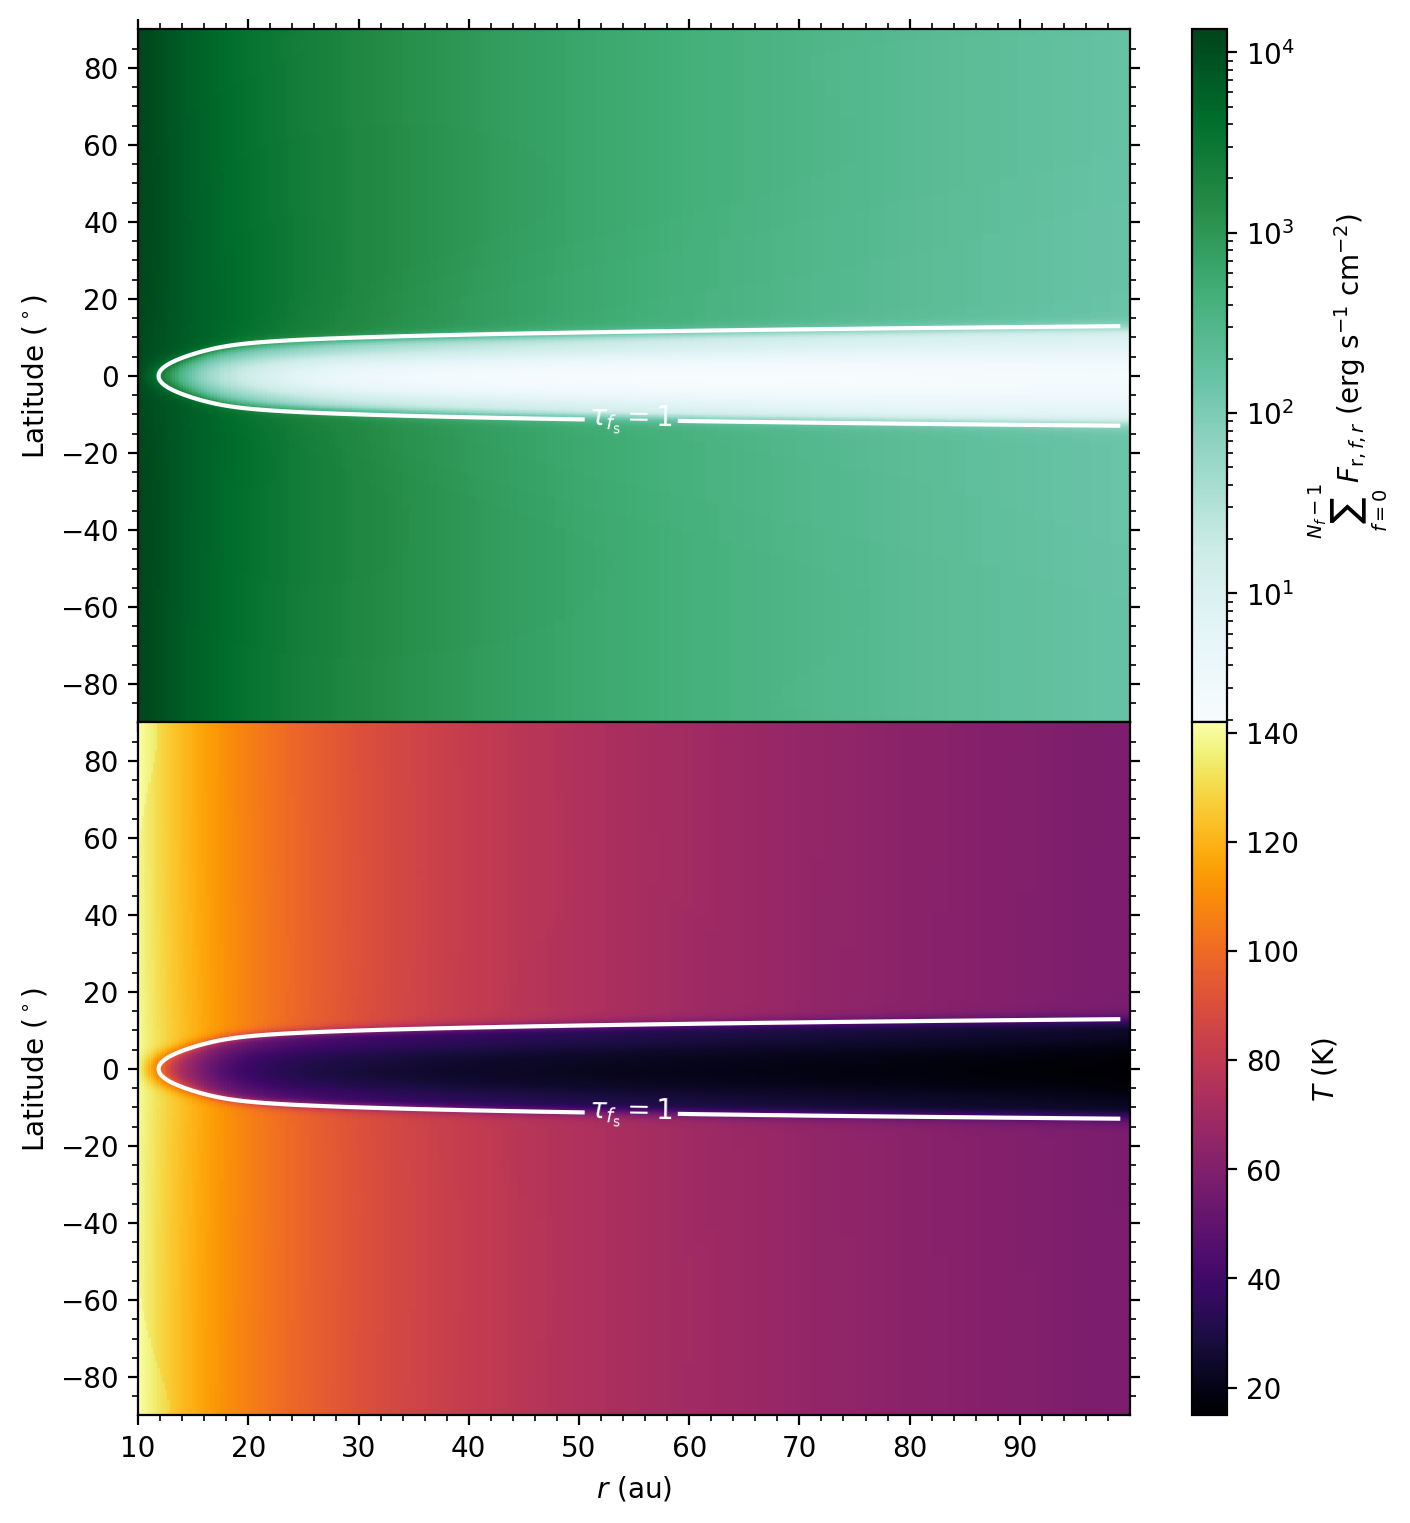

In [47]:
#===============================================================================
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Contour labels
def fmt(x):
  return rf'$\tau_{{f_\mathrm{{s}}}}={x:.0f}$'

# Conversions
rad2deg = 180/np.pi      # [deg]

# Constants
arad = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
au      = 1.495978707e13 # astronomical unit [cm]

# Read and plot
problem_id = 'dsharp'
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'
run = f'{problem_id}_abs-nonRTE/nfreq/64'
path = f'{base}/{run}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
L_au  = length_unit/au # [au]
T_unit = athinput['radiation']['T_unit']
N_f = 1
f_star = 54
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
t = athdf['Time']
# Radial flux field
Fx_field = np.zeros_like(athdf['rho'][0])
try:
  N_f = athinput['radiation']['n_frequency']
  dtau = (athdf[f'Sigma_a_{f_star}'][0] + athdf[f'Sigma_s_{f_star}'][0])\
         *np.diff(athdf['x1f'])
  for f in range(N_f):
    key = f'Fr_{f}_1'
    Fx_field += athdf[key][0]
except KeyError:
  dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
  Fx_field = athdf['Fr1'][0]
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=200)
im0 = axs[0].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        Fx_field*c_speed*arad*T_unit**4, cmap='BuGn',
                        norm=colors.LogNorm())
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im1 = axs[1].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        T_field*T_unit, cmap='inferno')#, norm=colors.LogNorm())
# tau = 1 surface
tau_field = np.cumsum(dtau, axis=1)

cbar_F = plt.colorbar(im0, label=r'$\sum_{f=0}^{N_f-1}F_{\mathrm{r},f,r}$ (erg s$^{-1}$ cm$^{-2}$)')
cbar_T = plt.colorbar(im1, label=r'$T$ (K)')

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, tau_field, [1, 1e5],
                  colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.minorticks_on()
  ax.set(ylabel=r'Latitude ($^\circ$)')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
# axs[0].set(title=rf'Athena++ ($N_f={N_f}$)')
axs[0].tick_params(axis='both', which='both', top=True)
axs[1].set(xlabel=r'$r$ (au)')
# plt.savefig('thermal_equilibrium.png', dpi=600, bbox_inches='tight',
#             pad_inches=0.01)
print(run)

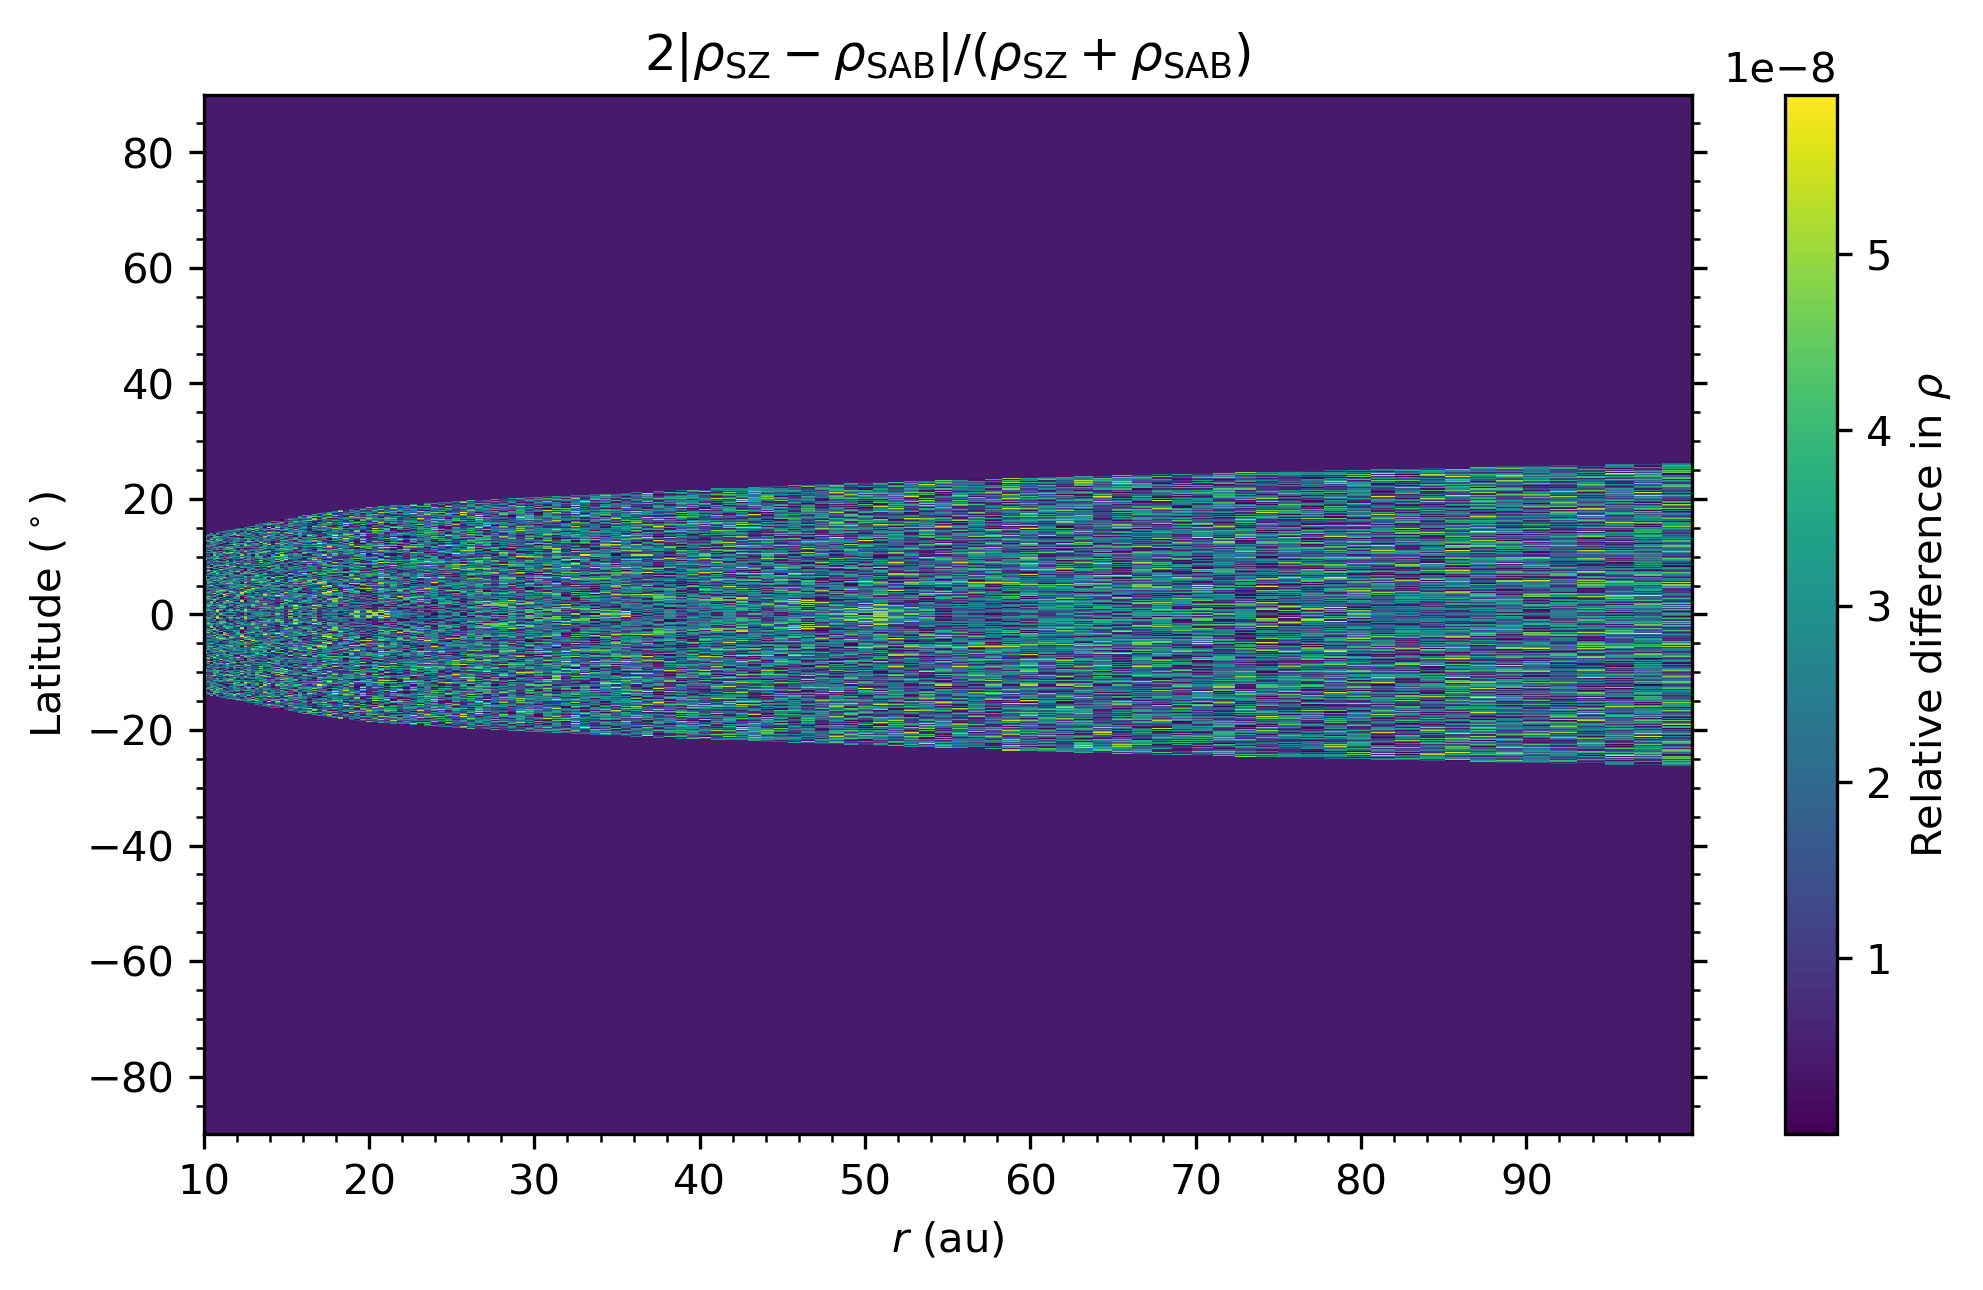

In [40]:
#===============================================================================
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Constants, units, conversions
rad2deg = 180/np.pi      # [deg]
au      = 1.495978707e13 # astronomical unit [cm]

# SAB
problem_id = 'dsharp'
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'
run = f'{problem_id}_abs-nonRTE/nfreq/64'
path = f'{base}/{run}'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
L_au = length_unit/au
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00000.athdf')
rho_sab = athdf['rho'][0]

# SZ
path = f'zhang24comp/sz/hybrid'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00000.athdf')
rho_sz = athdf['rho'][0]

# Plot
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
rel_diff = 2*np.abs(rho_sz - rho_sab)/(rho_sz + rho_sab)
im = ax.pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, rel_diff)

# Format (sub)plots
plt.colorbar(im, label=r'Relative difference in $\rho$')
ax.minorticks_on()
ax.set(xlabel='$r$ (au)', ylabel=r'Latitude ($^\circ$)',
       title=r'$2|\rho_\mathrm{SZ} - \rho_\mathrm{SAB}|$'\
             +r'$/(\rho_\mathrm{SZ} + \rho_\mathrm{SAB})$')
ax.tick_params(axis='both', which='both', right=True)

zhang24comp/sz/hybrid


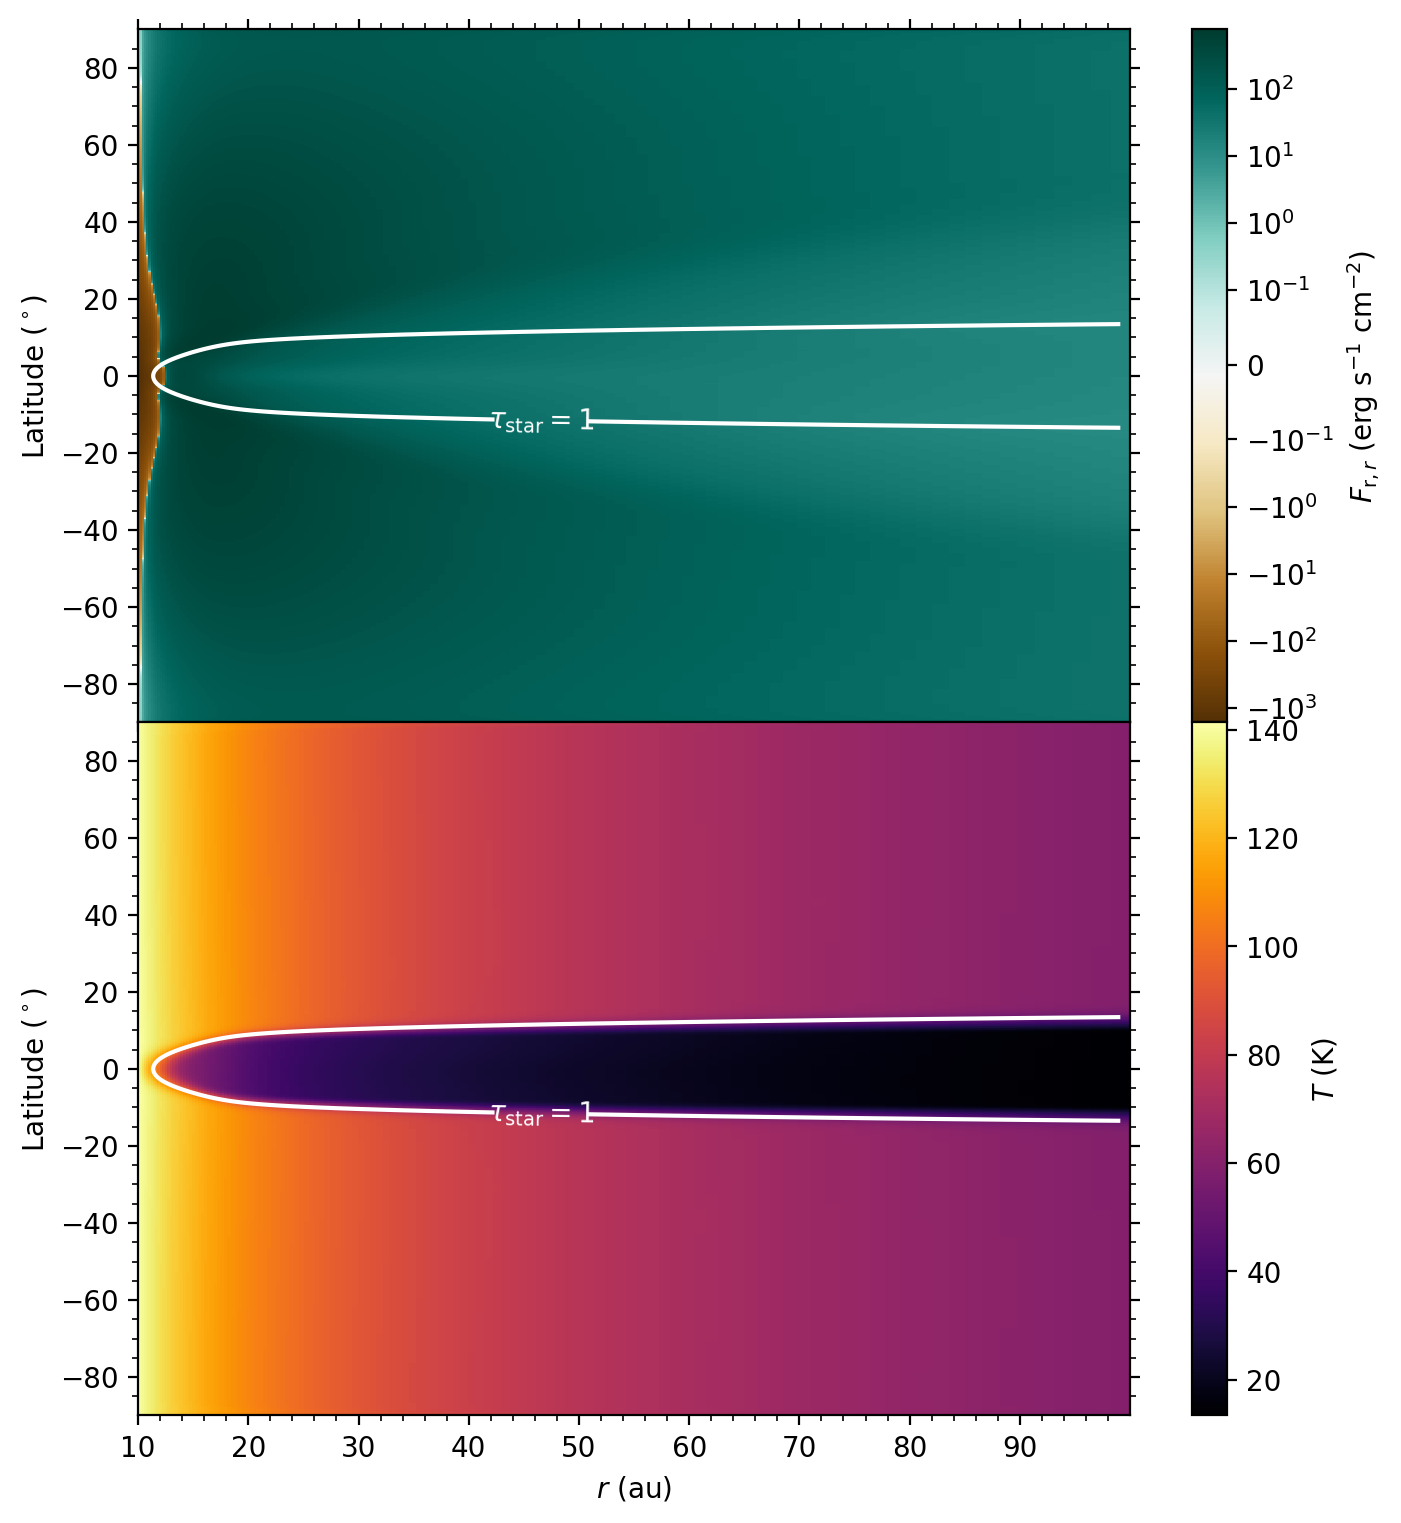

In [20]:
#===============================================================================
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Contour labels
def fmt(x):
  return rf'$\tau_\mathrm{{star}}={x:.0f}$'

# Conversions
rad2deg = 180/np.pi      # [deg]

# Constants
arad    = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
au      = 1.495978707e13 # astronomical unit [cm]
L_au    = length_unit/au # [au]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=200)
path = f'zhang24comp/sz/hybrid'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
density_unit = athinput['radiation']['rhounit']
length_unit = athinput['radiation']['lunit']
L_au    = length_unit/au # [au]
T_unit = athinput['radiation']['Tunit']
kappa_star = athinput['radiation']['kappa_star']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00100.athdf')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im0 = axs[0].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        Fx_field*c_speed*arad*T_unit**4,
                        # cmap='BuGn', norm=colors.LogNorm())
                        cmap='BrBG',
                        norm=colors.SymLogNorm(linthresh=1e-1, linscale=1))
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im1 = axs[1].pcolormesh(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg,
                        T_field*T_unit, cmap='inferno')#, norm=colors.LogNorm())
# tau = 1 surface
dtau = kappa_star*density_unit*length_unit*athdf['rho'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

# Format plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v']*L_au, 90-athdf['x2v']*rad2deg, tau_field, [1, 1e5],
                  colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.minorticks_on()
  ax.set(ylabel=r'Latitude ($^\circ$)')
  ax.tick_params(axis='both', which='both', right=True)
plt.colorbar(im0, label=r'$F_{\mathrm{r},r}$ (erg s$^{-1}$ cm$^{-2}$)')
plt.colorbar(im1, label=r'$T$ (K)')
plt.subplots_adjust(hspace=0)
# axs[0].set(title=rf'Athena++ ($N_f={N_f}$)')
axs[0].tick_params(axis='both', which='both', top=True)
axs[1].set(xlabel=r'$r$ (au)')
# plt.savefig('thermal_equilibrium.png', dpi=600, bbox_inches='tight',
#             pad_inches=0.01)
print(f'{path}')

hybrid


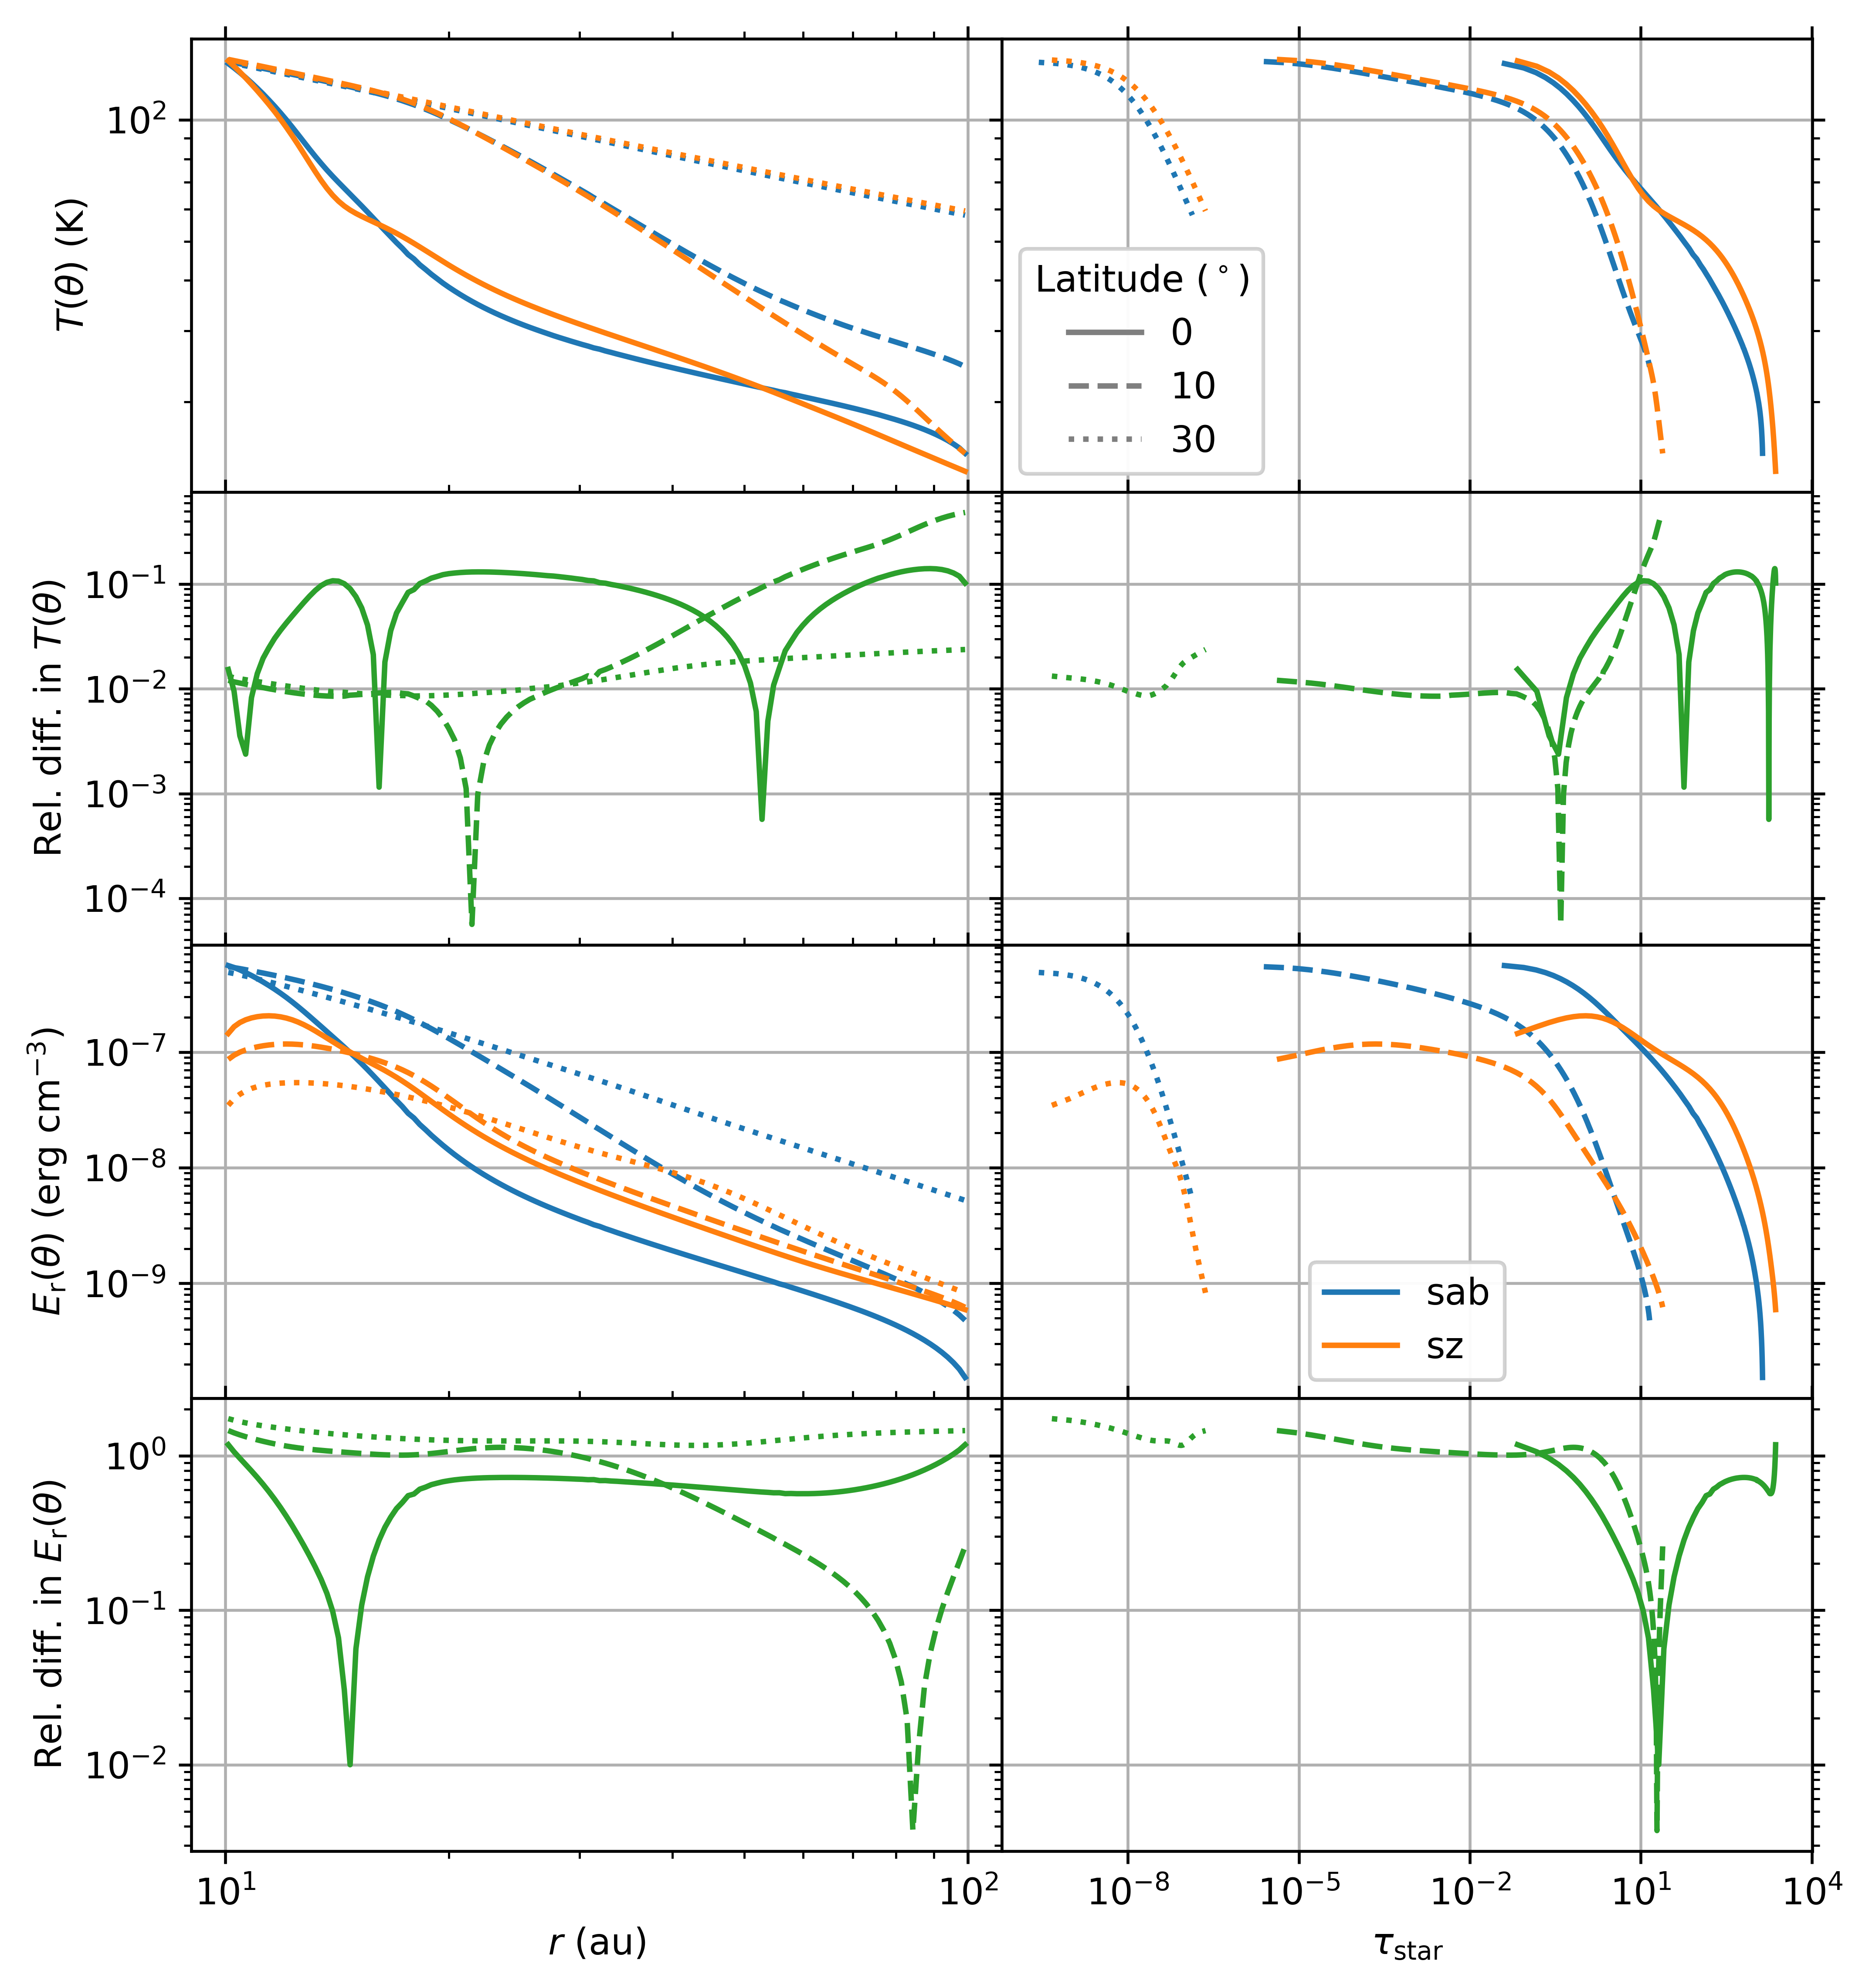

In [48]:
#===============================================================================
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Constants, units, conversions
arad    = 7.565733250033928e-15
c_speed = 2.99792458e10  # // speed of light
rad2deg = 180/np.pi      # [deg]
au      = 1.495978707e13 # astronomical unit [cm]

# Prepare plots
fig, axs = plt.subplots(nrows=4, ncols=2, sharex='col', sharey='row',
                        figsize=(8, 9), dpi=600)
tab_colors = list(matplotlib.colors.TABLEAU_COLORS)
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 80, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# SAB
problem_id = 'dsharp'
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'
run = f'{problem_id}_abs-nonRTE/nfreq/64'
path = f'{base}/{run}'
f_star = 54
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
length_unit = athinput['radiation']['length_unit']
T_unit = athinput['radiation']['T_unit']
L_au = length_unit/au
dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
          /athinput['mesh']['nx2']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
dusttemp = athdf['press'][0]/athdf['rho'][0]*T_unit
Er = np.zeros_like(dusttemp)
dtau = athdf[f'Sigma_a_{f_star}'][0]*np.diff(athdf['x1f'])
tau = np.cumsum(dtau, axis=1)
try:
  N_f = athinput['radiation']['n_frequency']
  for f in range(N_f):
    Er += athdf[f'Er_{f}'][0]
except KeyError:
  Er = athdf['Er'][0]
Er *= arad*T_unit**4
for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    axs[0][0].plot(athdf['x1v']*L_au, dusttemp[j,:], tab_colors[0], ls=lss[th])
    axs[2][0].plot(athdf['x1v']*L_au, Er[j,:], tab_colors[0], ls=lss[th])
    axs[0][1].plot(tau[j,:], dusttemp[j,:], tab_colors[0], ls=lss[th])
    axs[2][1].plot(tau[j,:], Er[j,:], tab_colors[0],ls=lss[th])
c_solns.append(axs[1][1].plot([], [], tab_colors[0], label='sab')[0])

# SZ
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij/'\
       +f'{problem_id}_abs-sca/zhang24comp'
run = 'sz/hybrid'
path = f'{base}/{run}'
problem_id = 'disk'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}_sph_rad')
density_unit = athinput['radiation']['rhounit']
length_unit = athinput['radiation']['lunit']
L_au    = length_unit/au # [au]
T_unit = athinput['radiation']['Tunit']
dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
          /athinput['mesh']['nx2']
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00100.athdf')
dtau = kappa_star*density_unit*length_unit*athdf['rho'][0]*np.diff(athdf['x1f'])
tau = np.cumsum(dtau, axis=1)
T_field = athdf['press'][0]/athdf['rho'][0]
Er_field = athdf['Er'][0]
for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    rel_diff_T = 2*np.abs(T_field[j, :]*T_unit - dusttemp[j,:])\
                 /(T_field[j, :]*T_unit + dusttemp[j,:])
    rel_diff_Er = 2*np.abs(Er_field[j, :]*arad*T_unit**4 - Er[j,:])\
                  /(Er_field[j, :]*arad*T_unit**4 + Er[j,:])
    axs[0][0].plot(athdf['x1v']*L_au, T_field[j, :]*T_unit, tab_colors[1],
                   ls=lss[th])
    axs[1][0].plot(athdf['x1v']*L_au, rel_diff_T, tab_colors[2], ls=lss[th])
    axs[2][0].plot(athdf['x1v']*L_au, Er_field[j, :]*arad*T_unit**4,
                   tab_colors[1], ls=lss[th])
    axs[3][0].plot(athdf['x1v']*L_au, rel_diff_Er, tab_colors[2], ls=lss[th])
    axs[0][1].plot(tau[j, :], T_field[j, :]*T_unit, tab_colors[1], ls=lss[th])
    axs[1][1].plot(tau[j, :], rel_diff_T, tab_colors[2], ls=lss[th])
    axs[2][1].plot(tau[j, :], Er_field[j, :]*arad*T_unit**4, tab_colors[1],
                   ls=lss[th])
    axs[3][1].plot(tau[j, :], rel_diff_Er, tab_colors[2], ls=lss[th])
    ls_thetas.append(axs[0][0].plot([], [], 'tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])
c_solns.append(axs[1][1].plot([], [], tab_colors[1], label=f'{run[:-7]}')[0])

# Plot ghost points for colorless line style and add legends
ls_legend = axs[0][1].legend(title=r'Latitude ($^\circ)$', handles=ls_thetas)
color_legend = axs[2][1].legend(handles=c_solns)
# soln_legend = axs[1].legend(handles=ref_soln)
axs[0][1].add_artist(ls_legend)
axs[2][1].add_artist(color_legend)
# axs[1].add_artist(soln_legend)

# Format (sub)plots
for ax in axs.flat:
  ax.grid()
  ax.minorticks_on()
  ax.set(xscale='log', yscale='log')
  ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][0].set(ylabel=r'$T(\theta)$ (K)')
axs[1][0].set(ylabel=r'Rel. diff. in $T(\theta)$')
axs[2][0].set(ylabel=r'$E_\mathrm{r}(\theta)$ (erg cm$^{-3}$)')
axs[3][0].set(ylabel=r'Rel. diff. in $E_\mathrm{r}(\theta)$',
              xlabel=r'$r$ (au)')
axs[3][1].set(xlabel=r'$\tau_\mathrm{star}$')
# fig.suptitle(r'$\kappa_{f,\mathrm{D}\sharp}^\mathrm{abs+sca}$', y=0.92)
plt.subplots_adjust(hspace=0, wspace=0)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)
print(f'{run[-6:]}')